In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
sample=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
print('done')

done


In [3]:
sample.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [4]:
train.shape


(1460, 81)

In [5]:
newlist = [x for x in train.columns if train[x].isna().sum() > 0]
na_val=train[newlist].isna().sum()
print(na_val)
print(train.shape)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
(1460, 81)


In [6]:
train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [7]:
# look at numeric and categorical values separately 
df_num=train.select_dtypes('number')
df_cat=train.select_dtypes('object')
print(df_num.shape)
print(df_cat.shape)
#df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

(1460, 38)
(1460, 43)


In [8]:
pd.set_option('display.max_rows', None)
#train['MSSubClass']=train['MSSubClass'].astype(str)
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


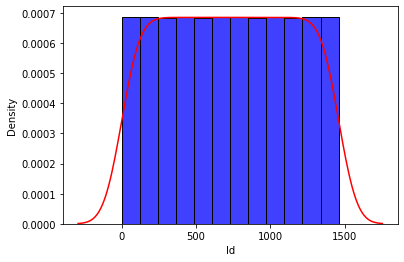

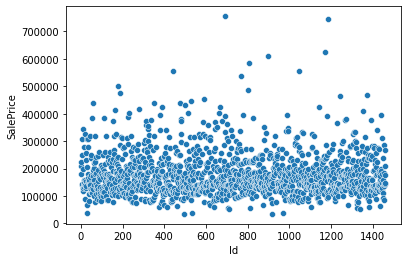

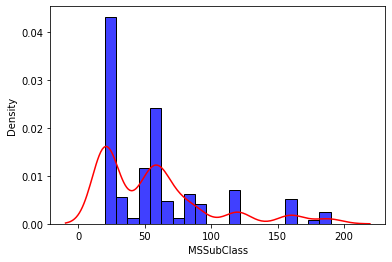

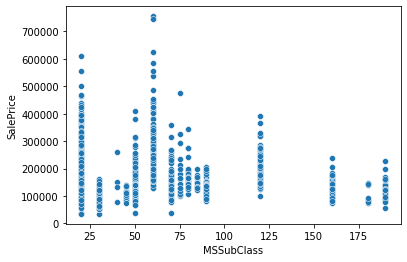

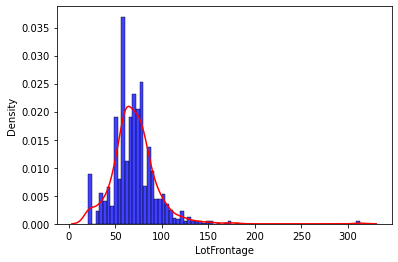

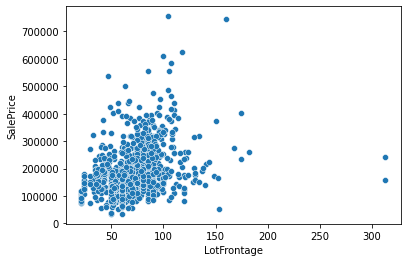

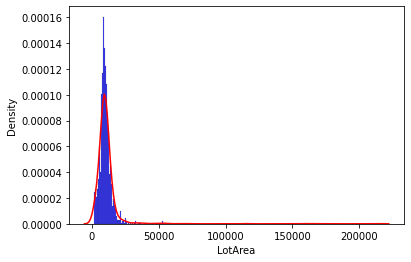

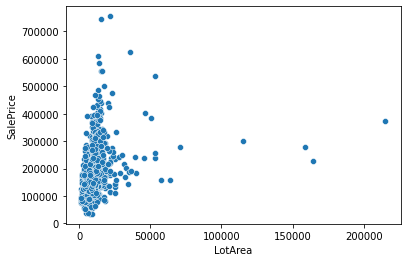

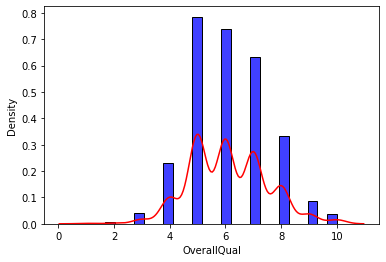

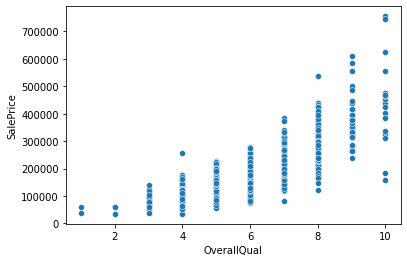

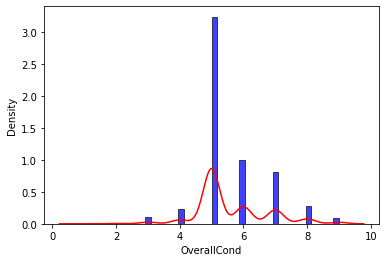

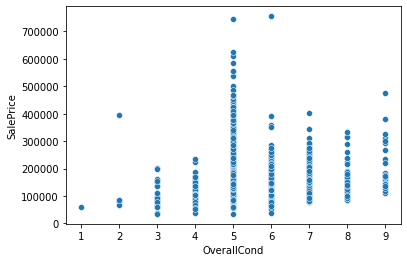

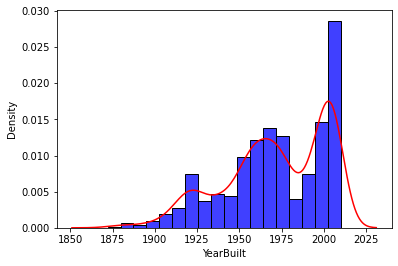

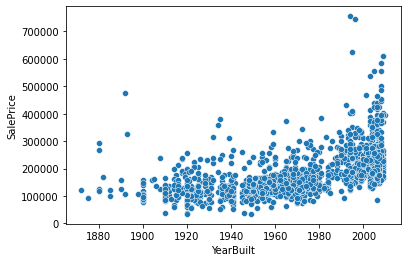

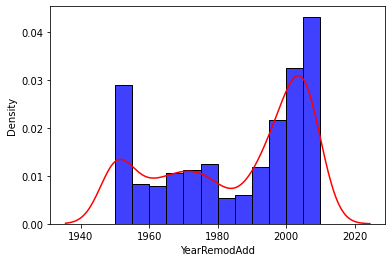

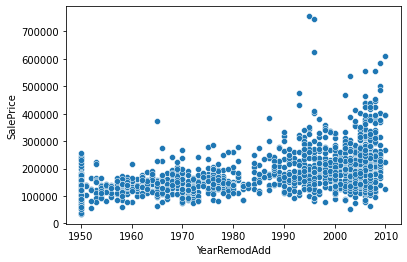

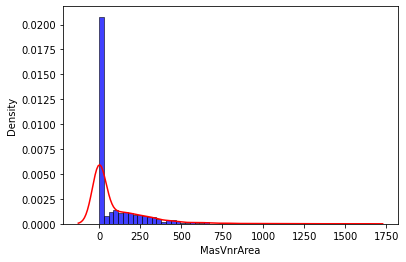

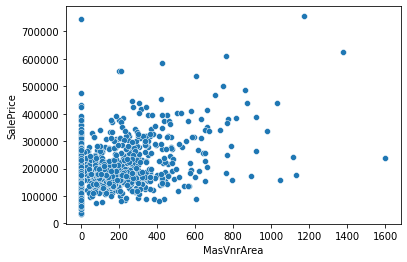

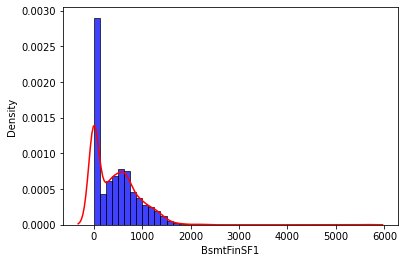

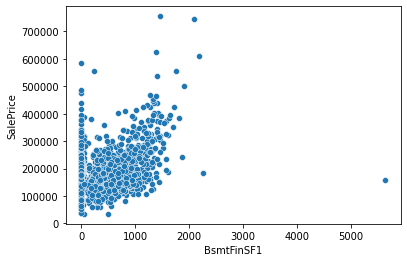

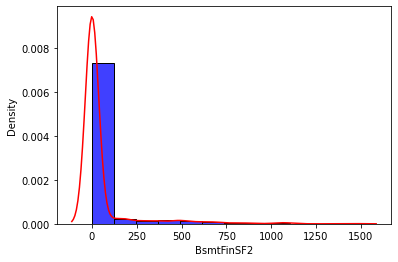

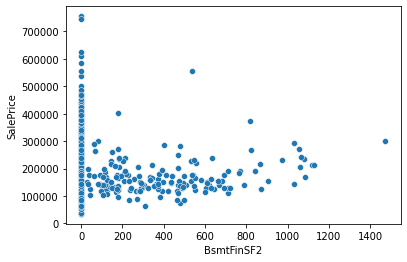

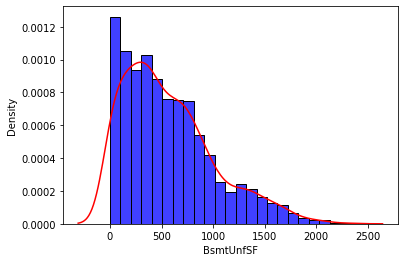

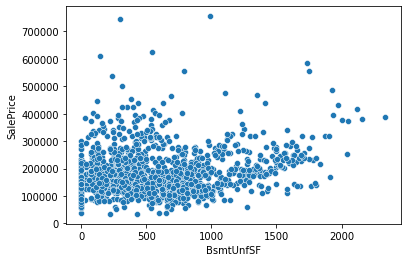

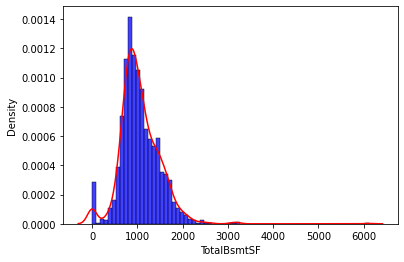

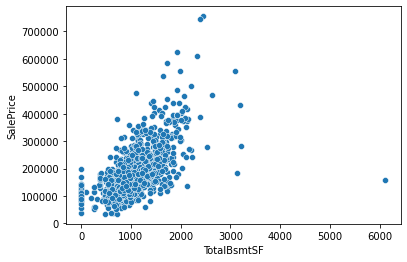

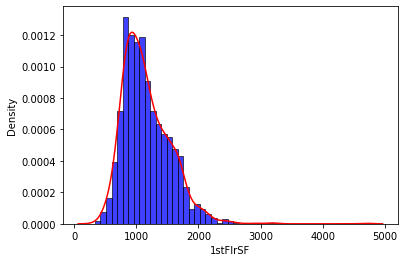

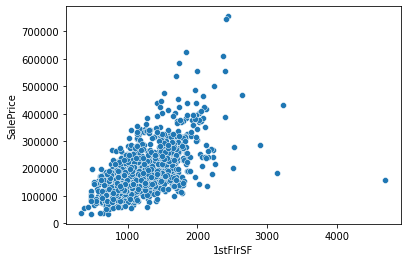

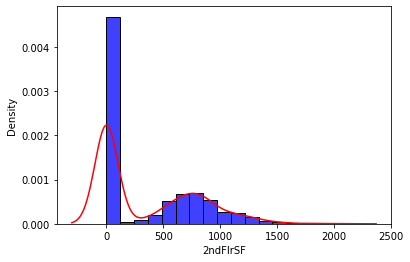

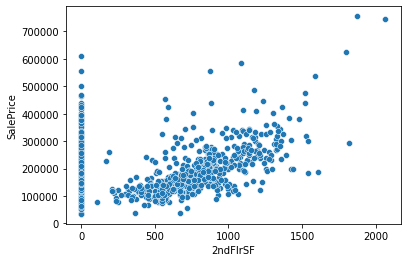

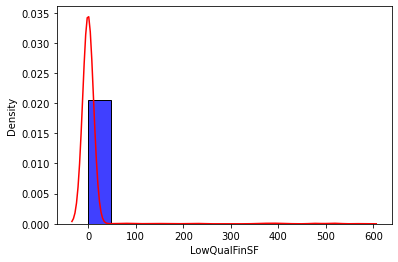

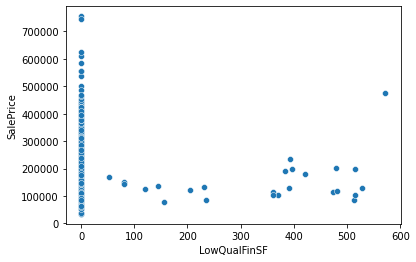

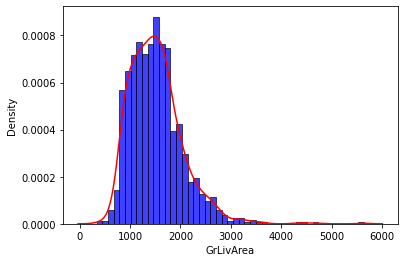

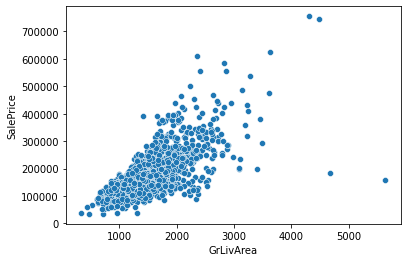

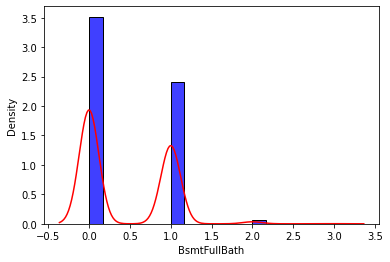

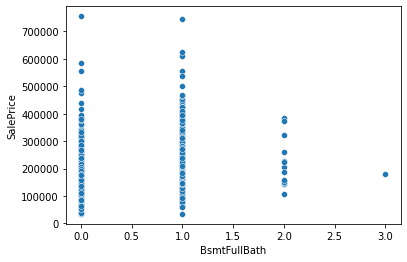

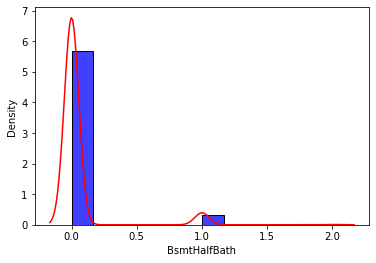

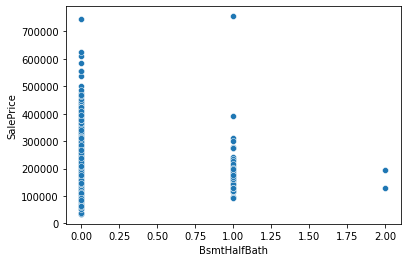

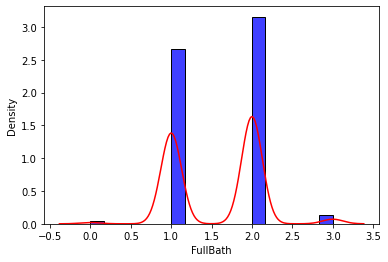

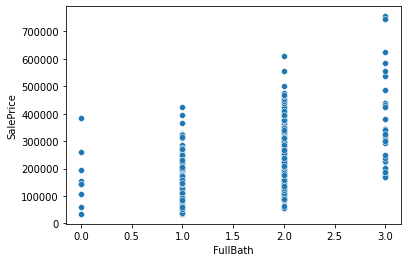

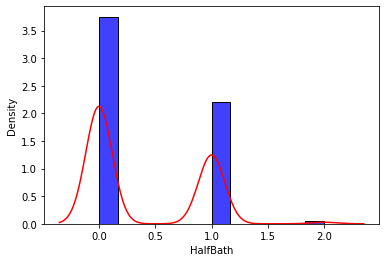

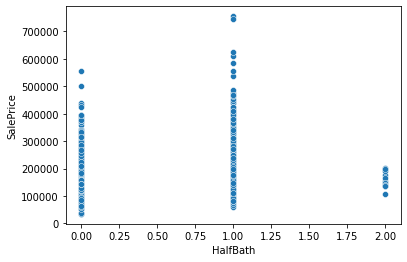

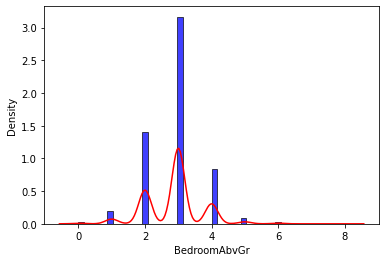

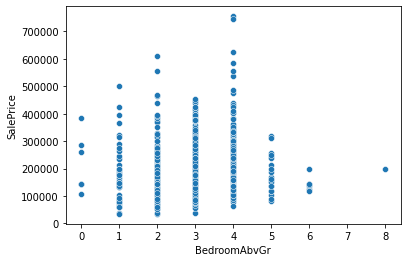

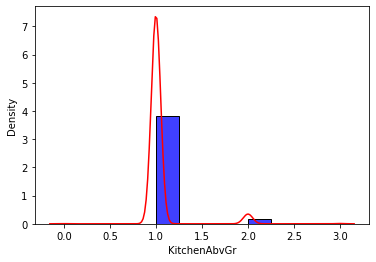

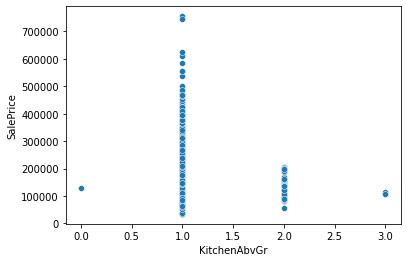

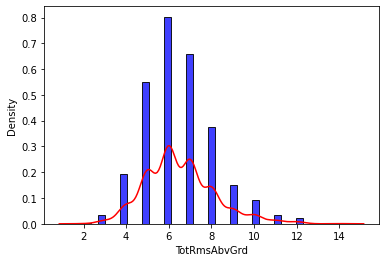

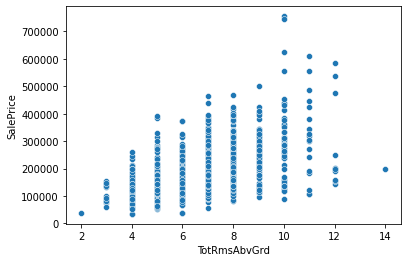

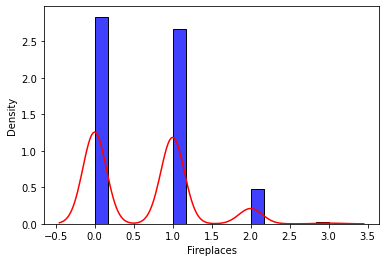

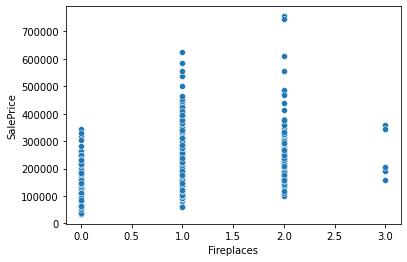

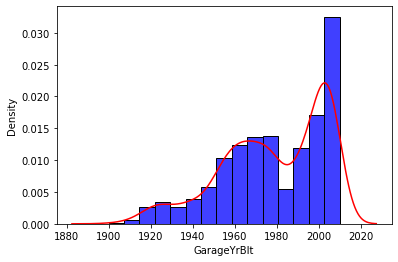

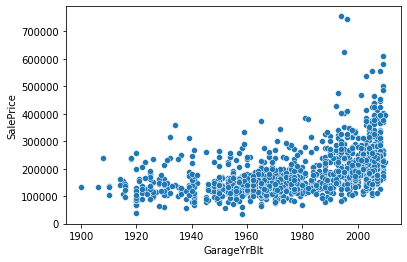

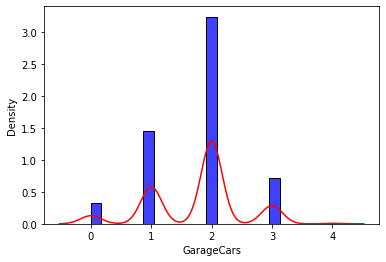

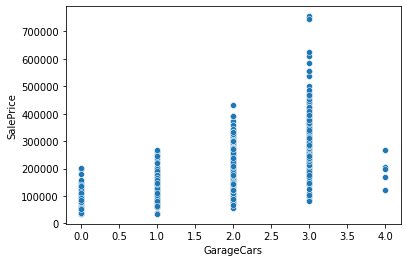

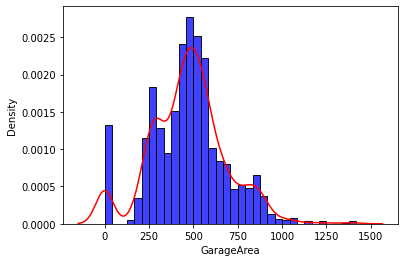

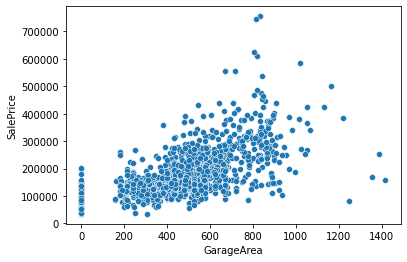

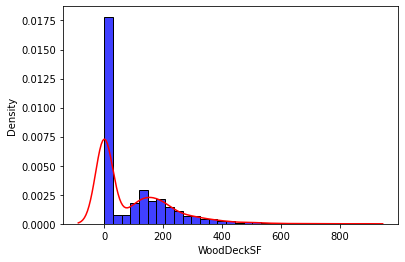

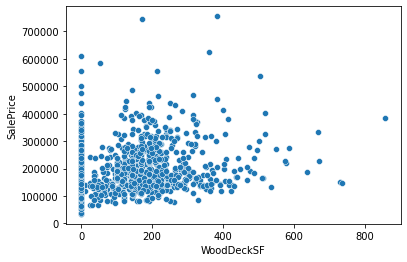

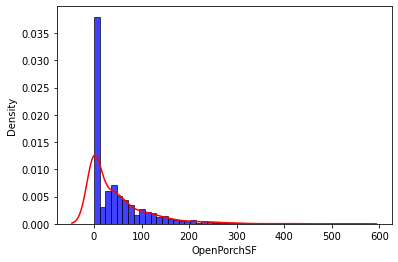

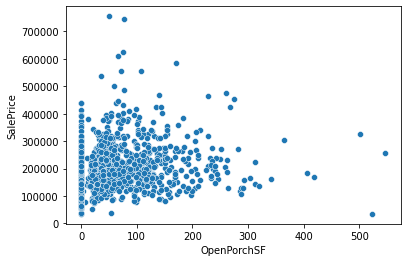

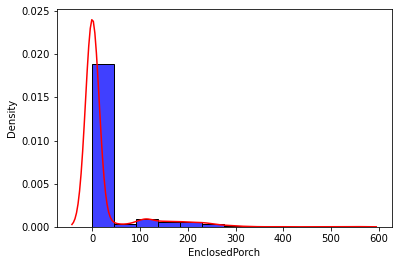

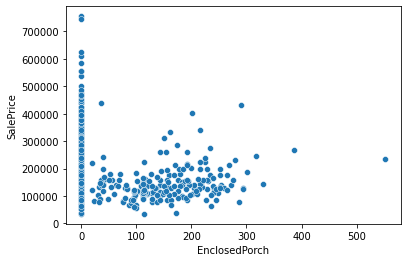

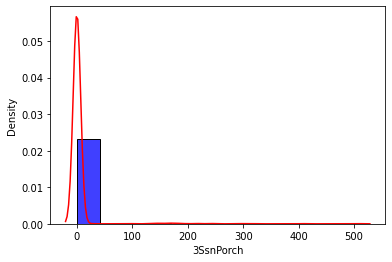

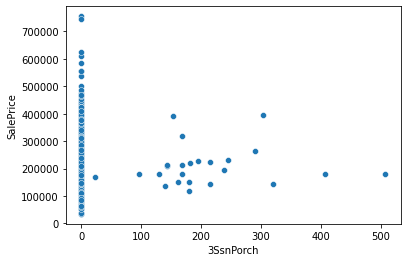

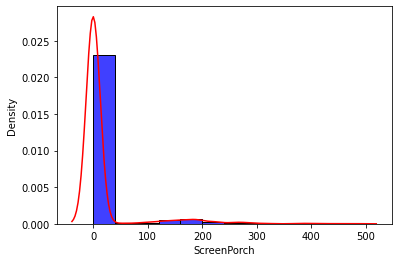

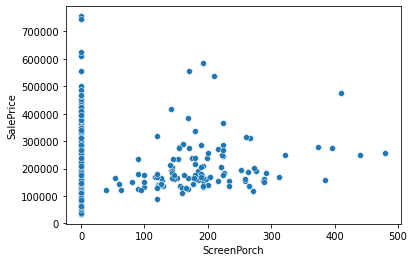

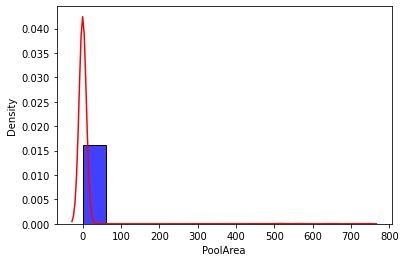

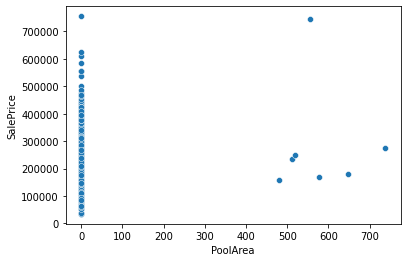

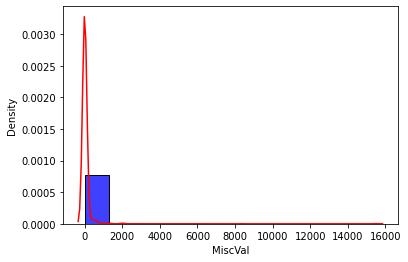

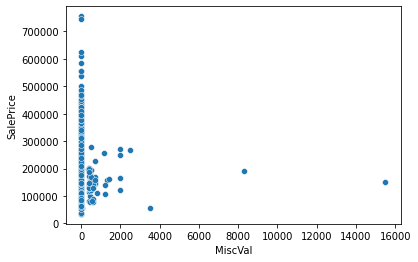

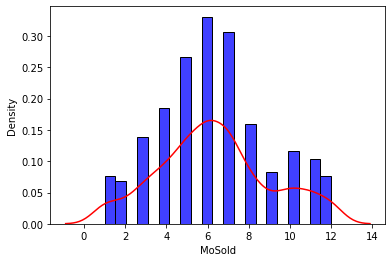

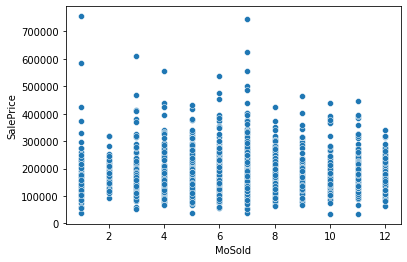

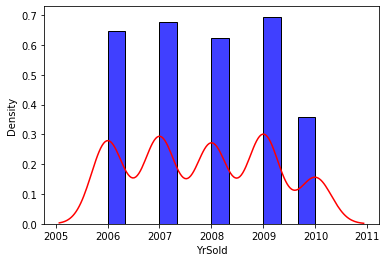

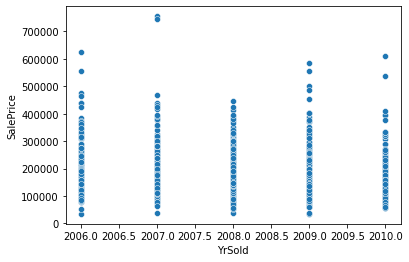

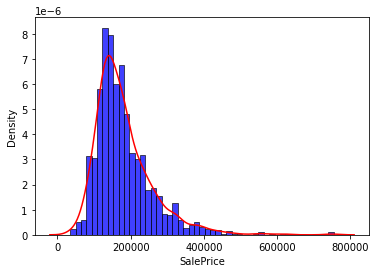

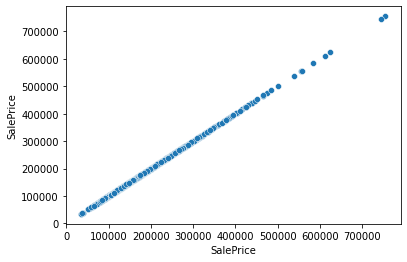

In [9]:
#distributions for all numeric variables 
for col in df_num.columns:
    # Density Plot and Histogram of all arrival delays
    #ax = sns.histplot(data=df_num, x=col, kde=True,line_kws={"color":"red"})
    sns.histplot(data=df_num,x=col, color='blue', stat='density')
    ax=sns.kdeplot(data=df_num,x=col, color='red')
    plt.show(ax)
    b=sns.scatterplot(data=df_num,x=col,y='SalePrice')
    plt.show()
    
    

# Cleaning Numerical Variables

After examining the numerical variables we can start to clean and drop those variable

In [10]:
#First of all i would like to see if the variables that i want to remove are corraleted with  the output variable
#Correlation is only an index for linear relationship but from the scatterplo

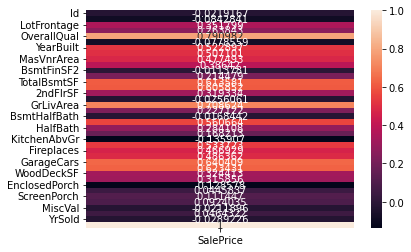

In [11]:
corrMatrix = df_num.corr()
#sns.set(rc = {'figure.figsize':(12,12)})
a=sns.heatmap(df_num.corr().loc[:,['SalePrice']],fmt='g',annot=True)
plt.show(a)

In [12]:

train['MSSubClass']=train['MSSubClass'].astype(str)

In [13]:
df_cat.shape

(1460, 43)

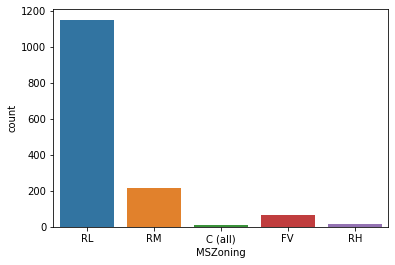

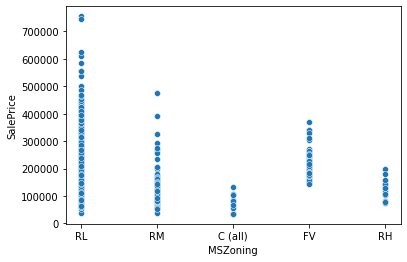

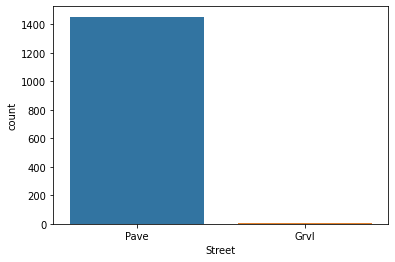

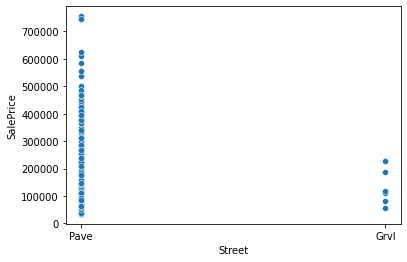

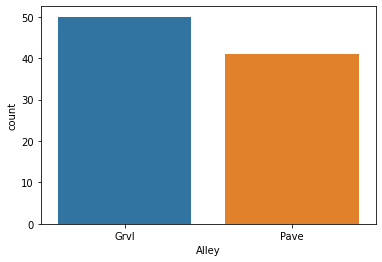

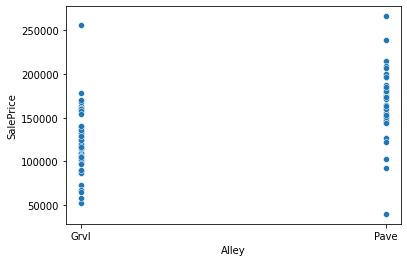

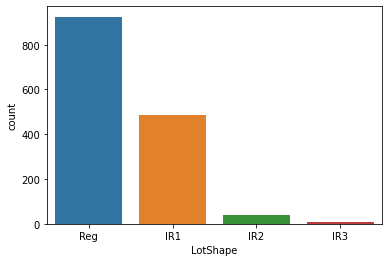

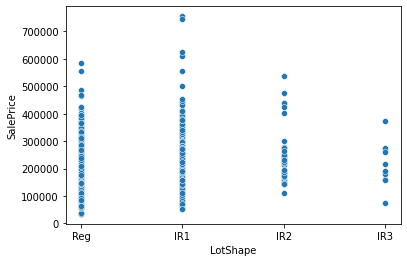

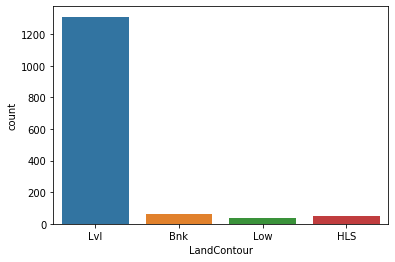

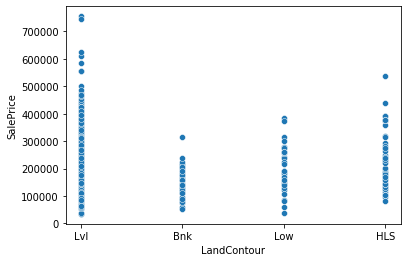

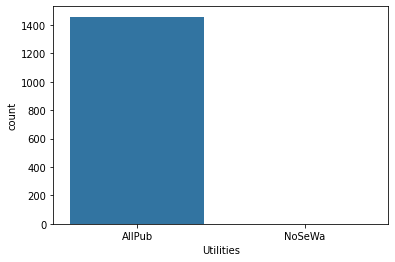

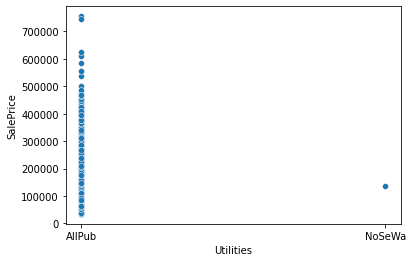

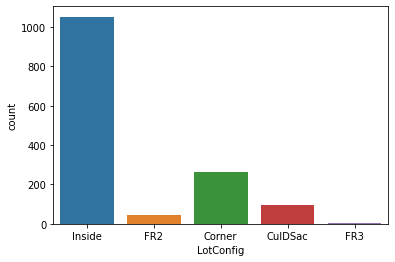

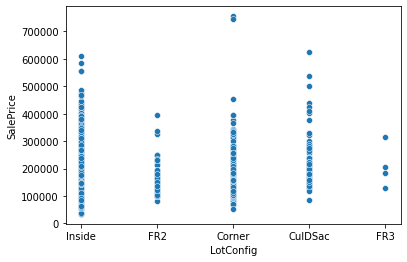

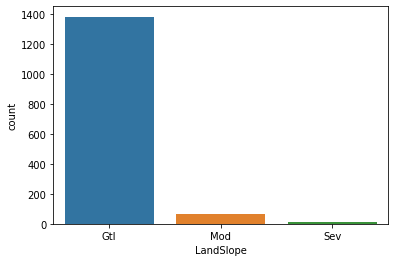

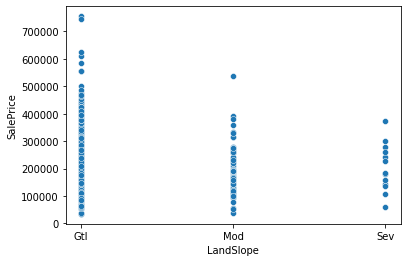

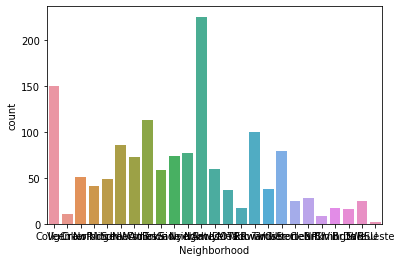

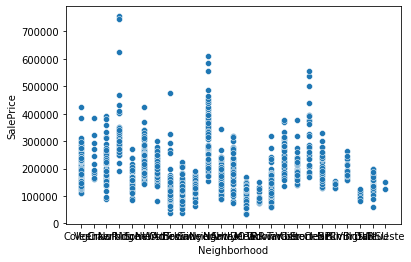

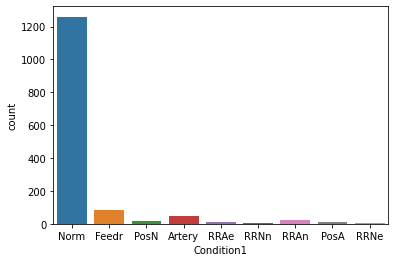

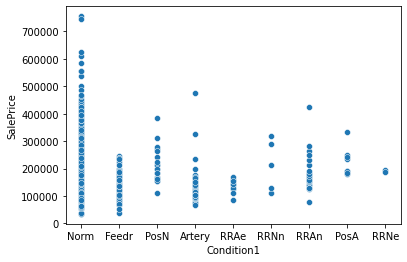

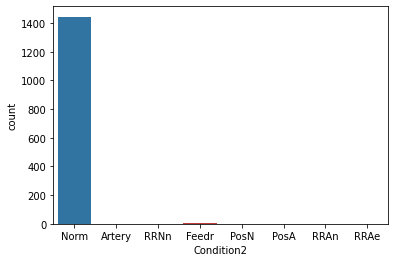

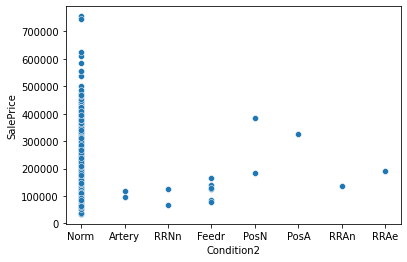

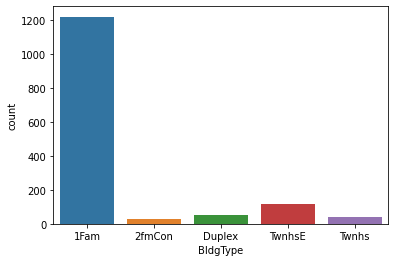

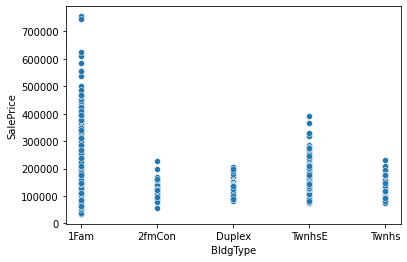

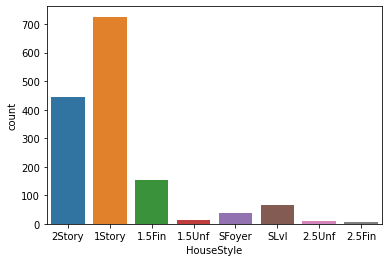

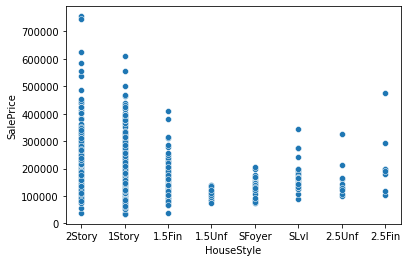

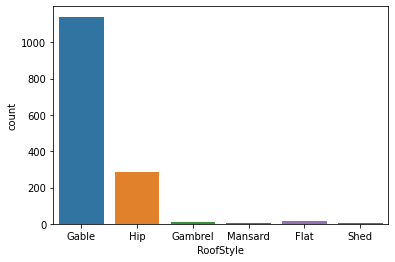

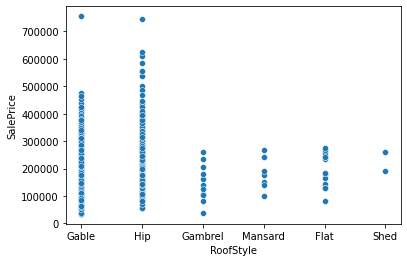

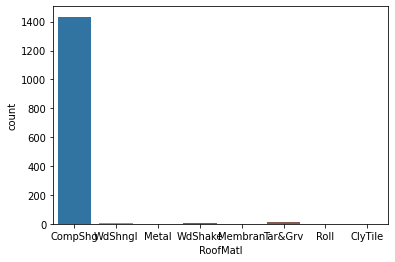

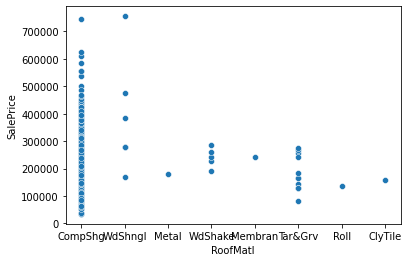

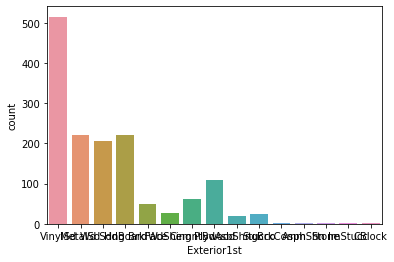

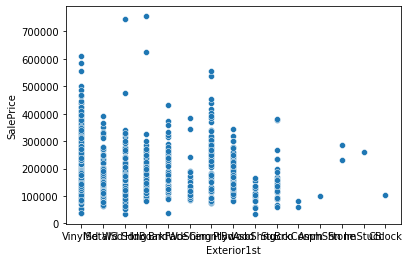

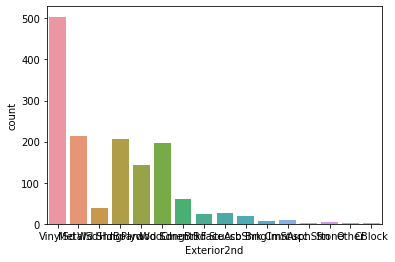

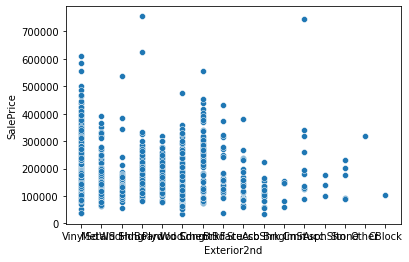

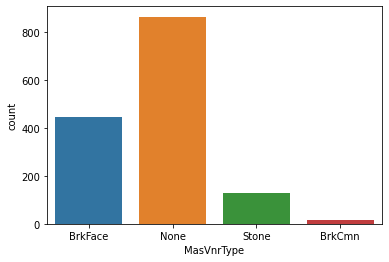

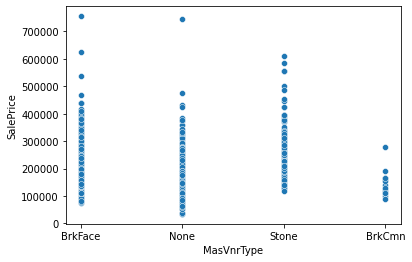

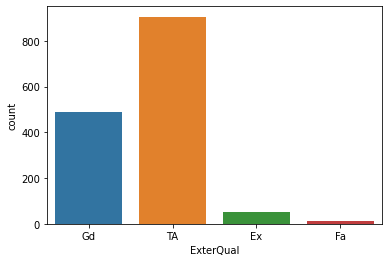

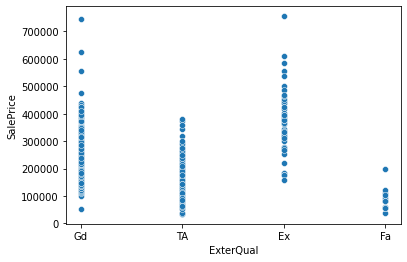

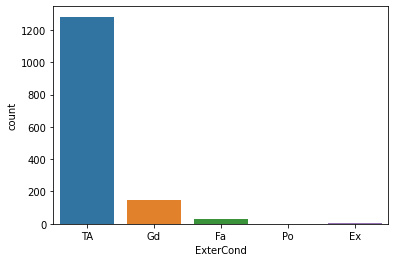

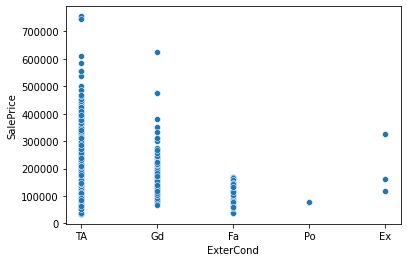

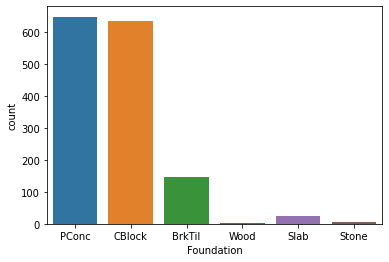

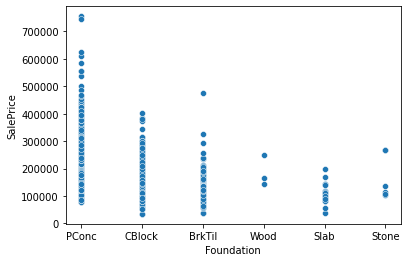

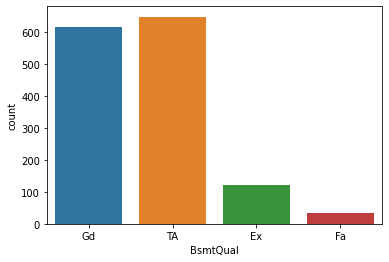

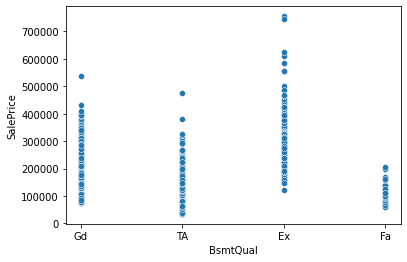

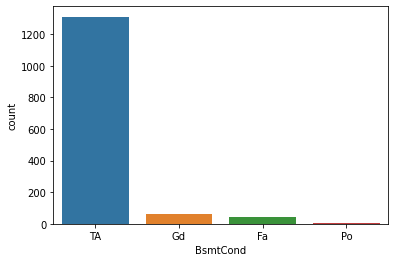

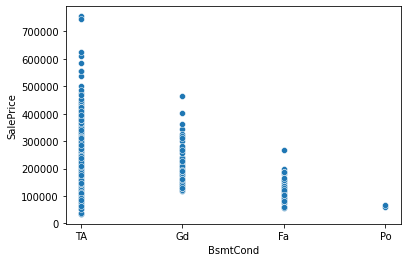

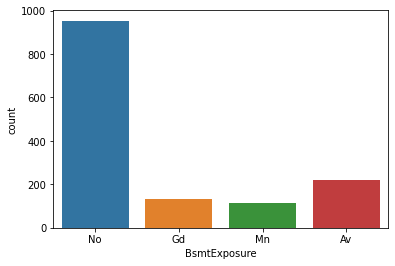

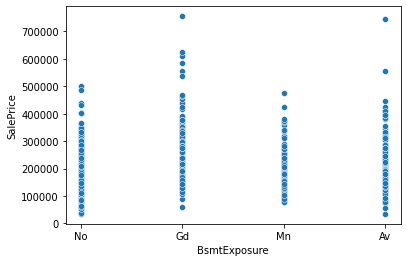

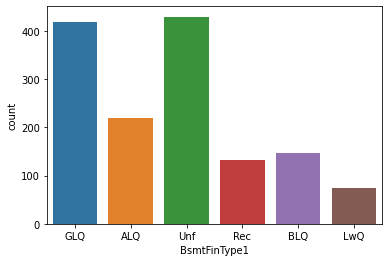

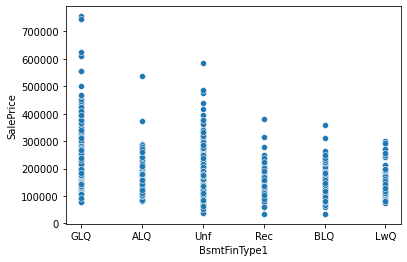

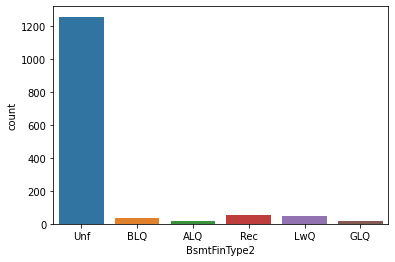

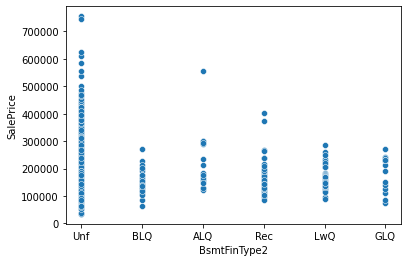

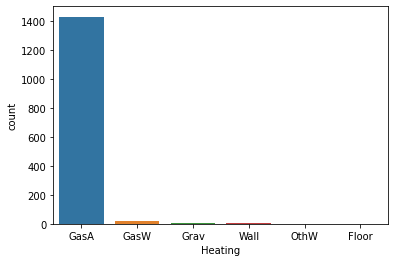

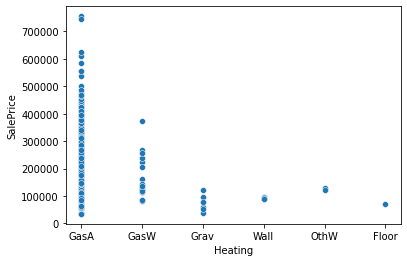

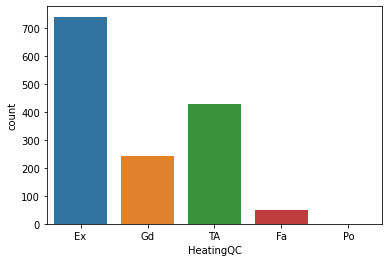

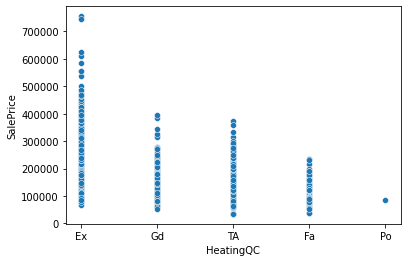

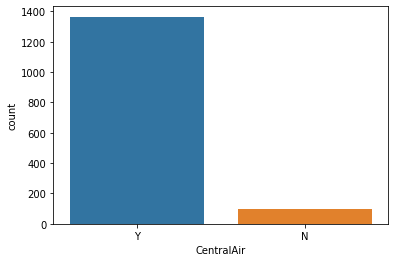

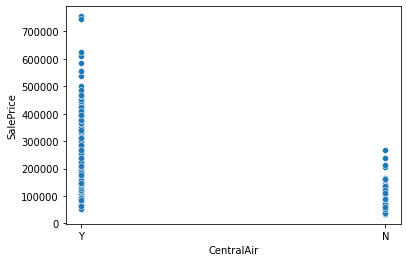

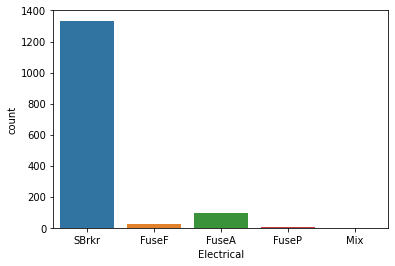

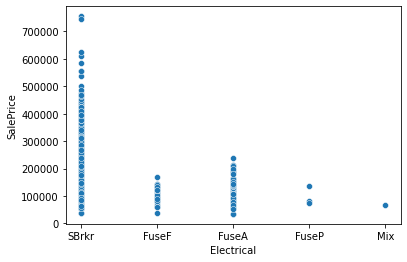

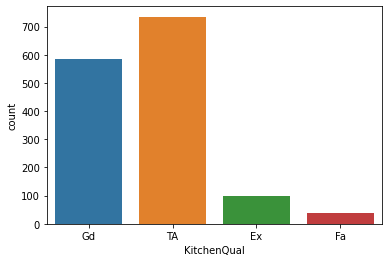

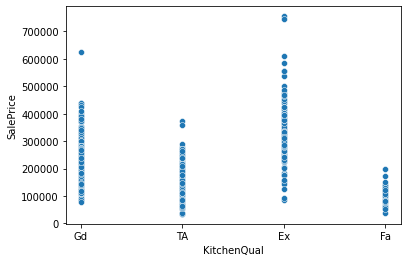

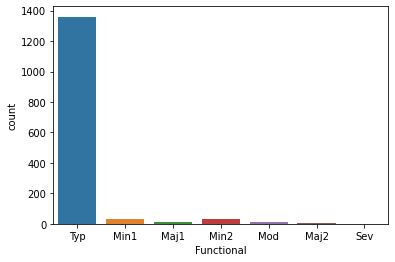

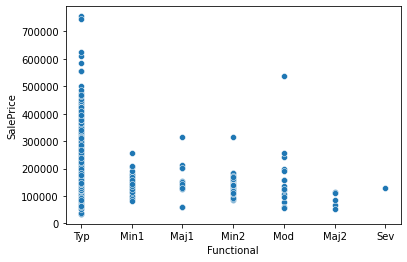

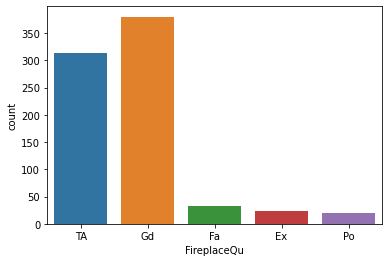

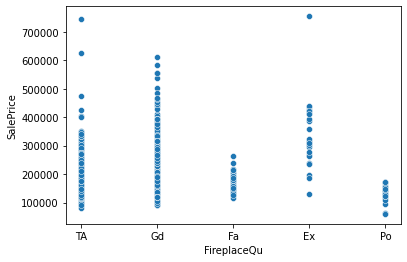

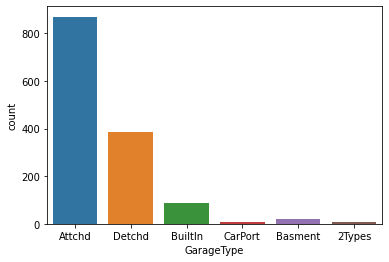

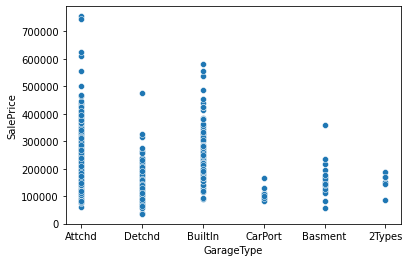

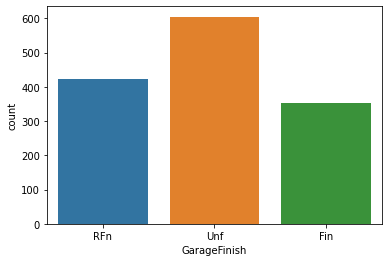

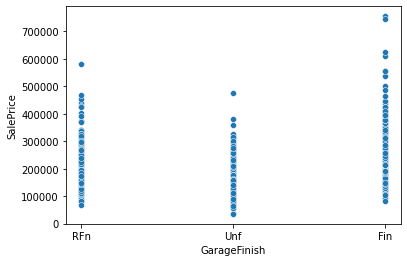

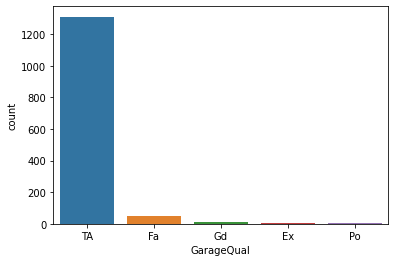

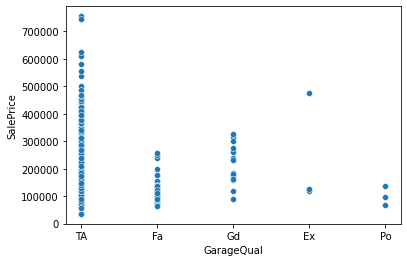

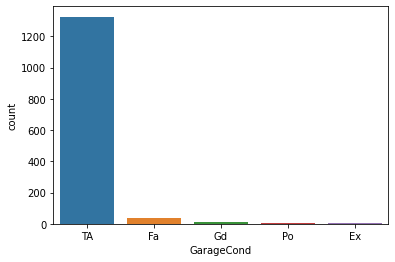

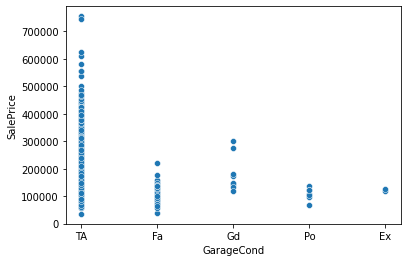

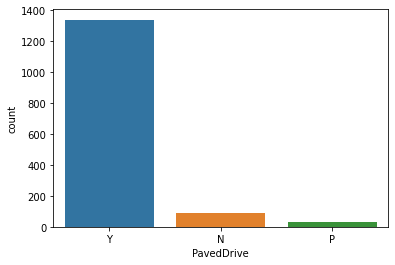

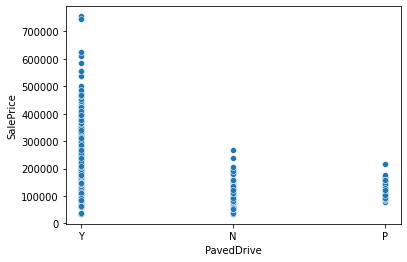

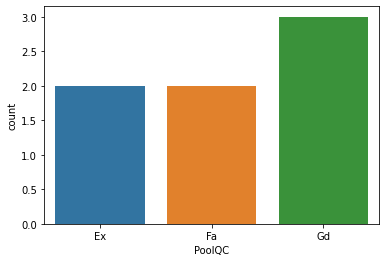

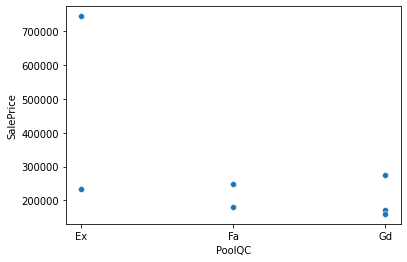

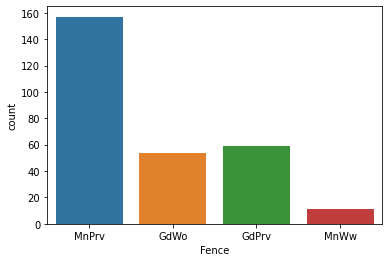

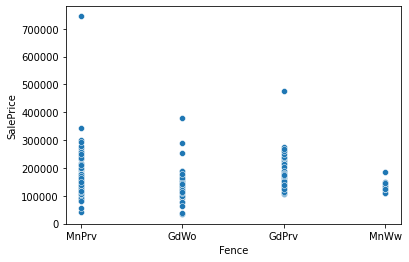

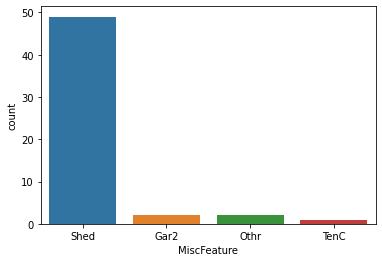

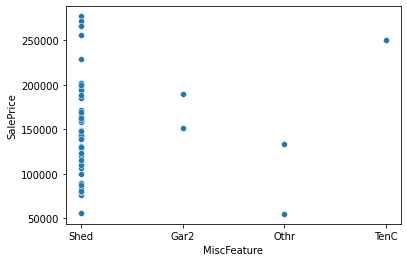

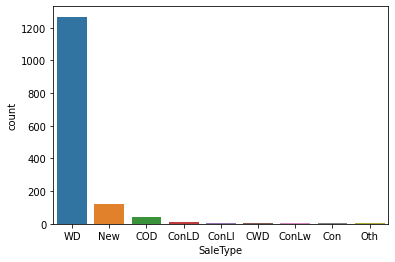

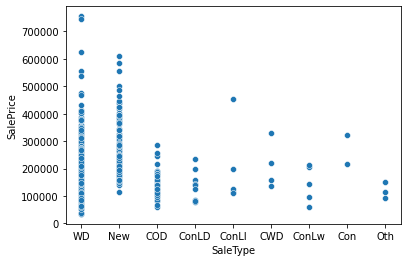

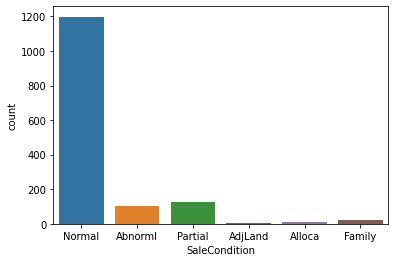

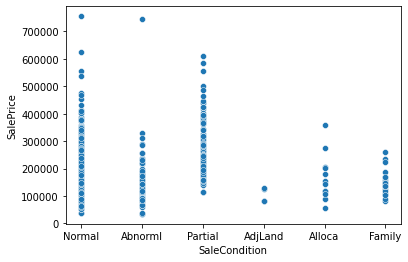

In [14]:


for col in df_cat:
        a=sns.countplot(data=df_cat, x=col)
        plt.show()
        b=sns.scatterplot(data=train,x=col,y='SalePrice')
        plt.show()
      
        

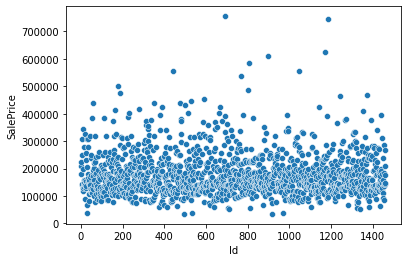

0


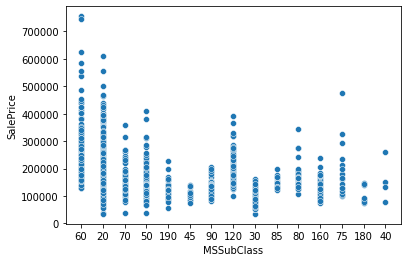

1


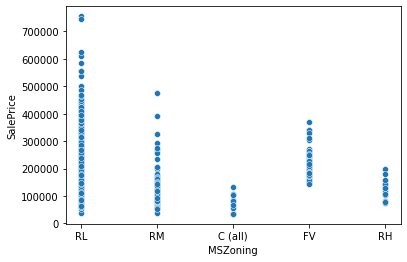

2


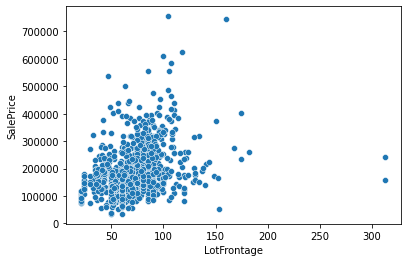

3


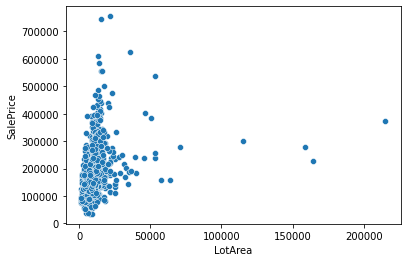

4


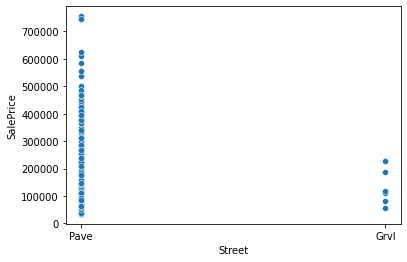

5


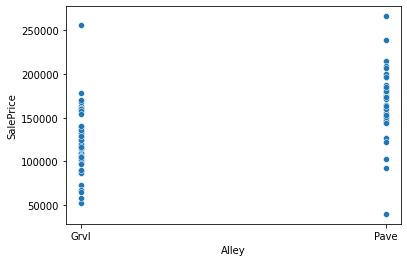

6


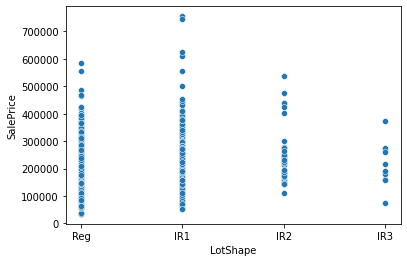

7


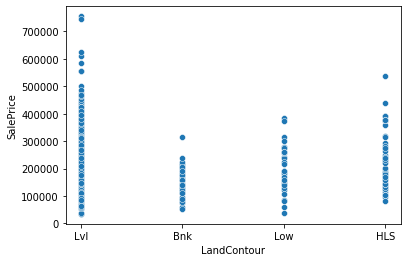

8


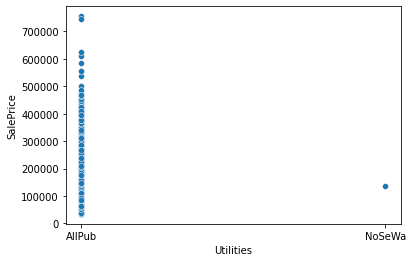

9


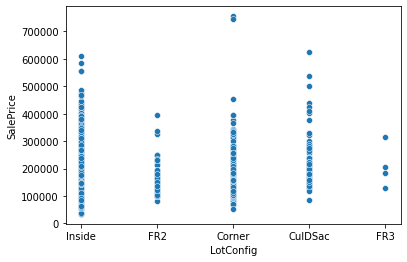

10


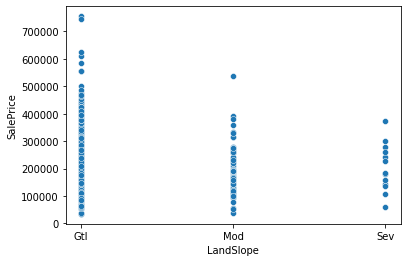

11


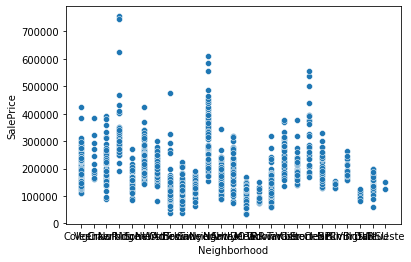

12


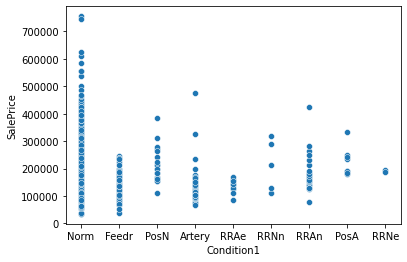

13


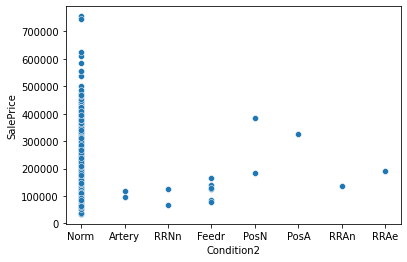

14


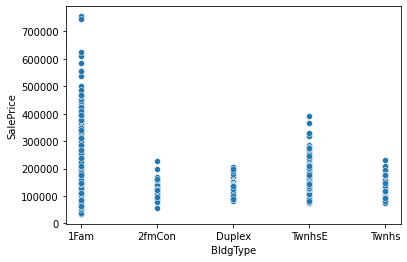

15


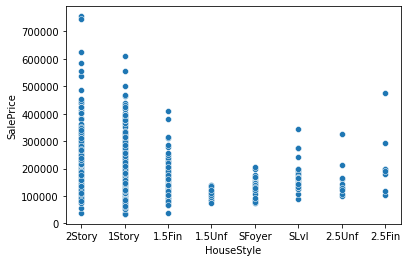

16


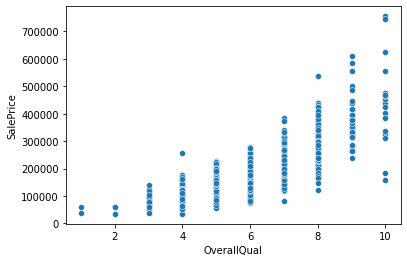

17


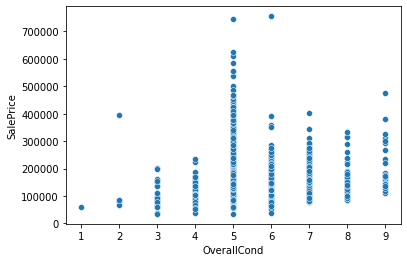

18


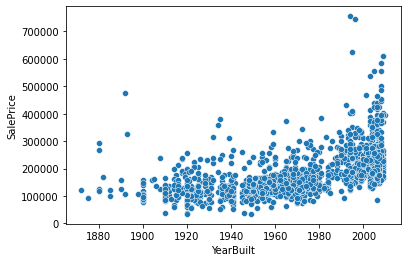

19


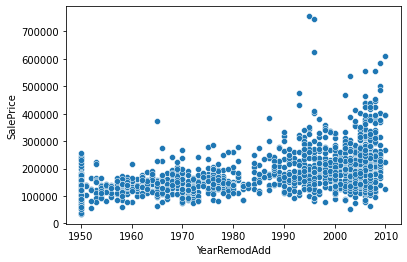

20


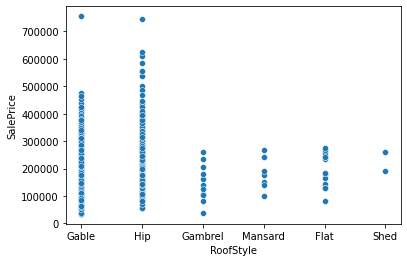

21


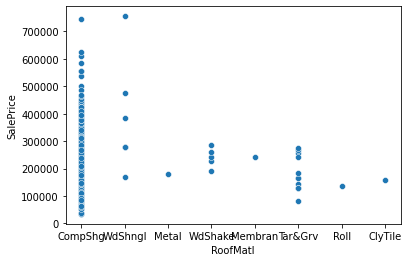

22


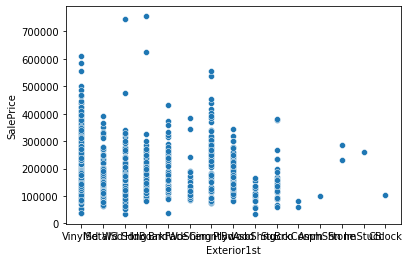

23


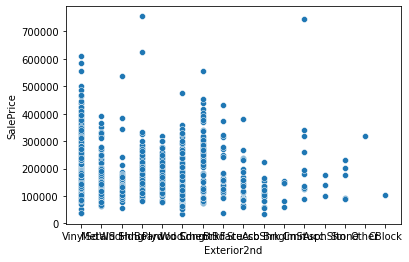

24


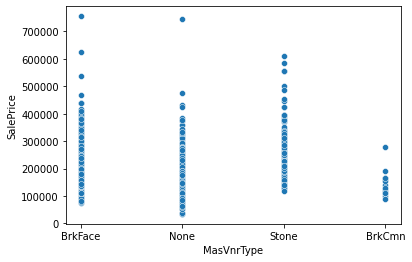

25


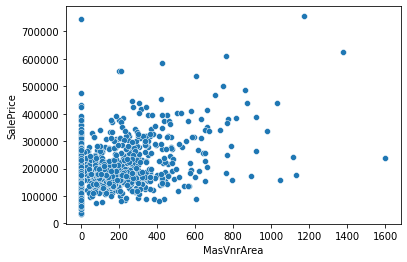

26


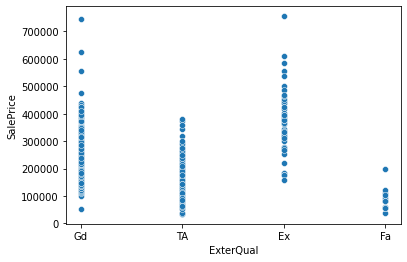

27


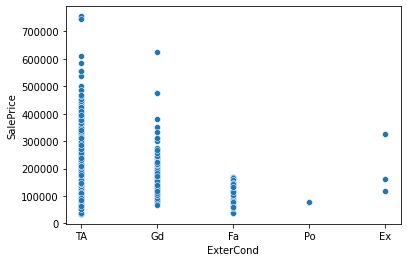

28


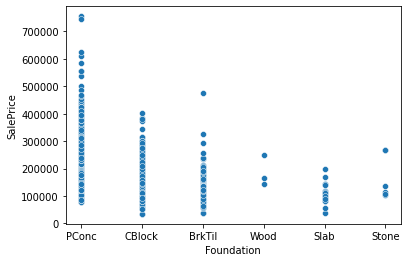

29


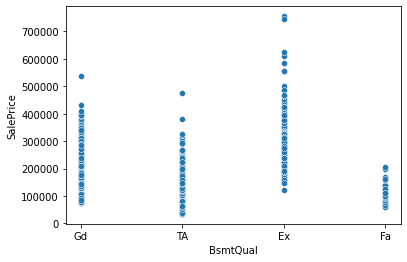

30


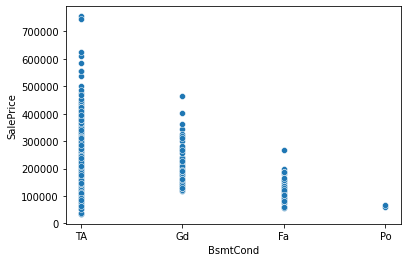

31


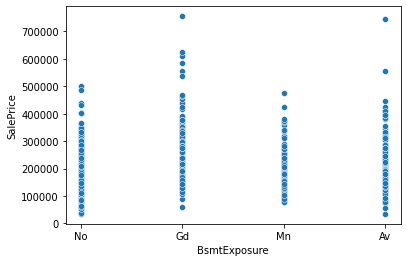

32


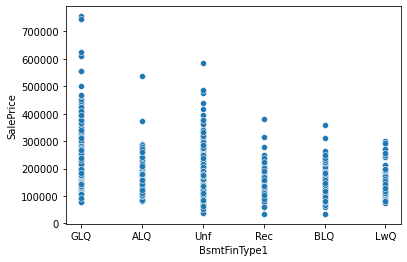

33


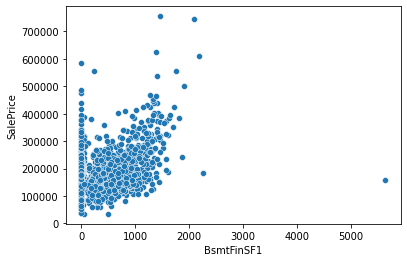

34


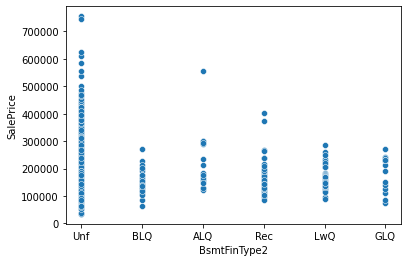

35


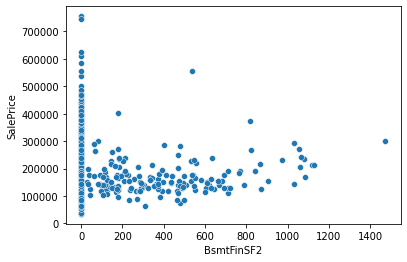

36


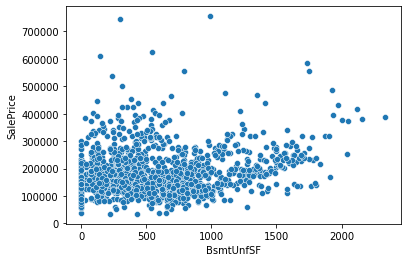

37


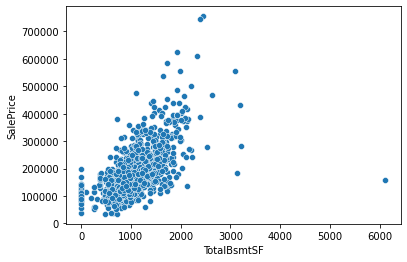

38


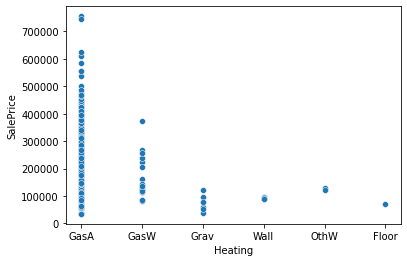

39


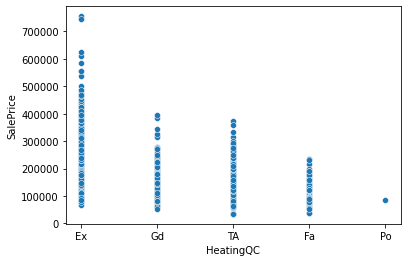

40


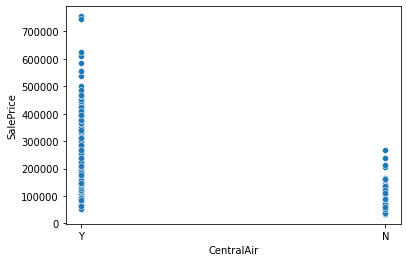

41


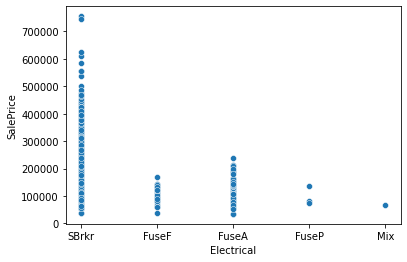

42


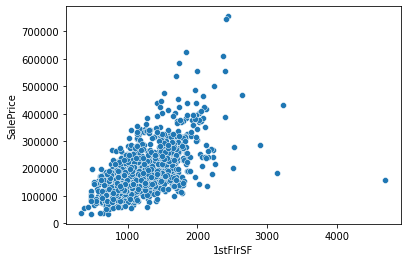

43


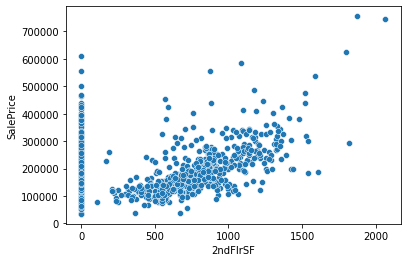

44


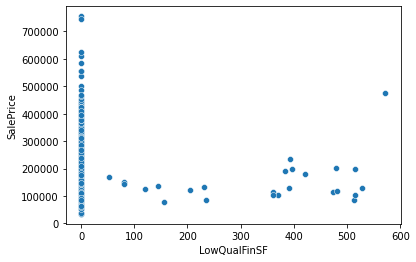

45


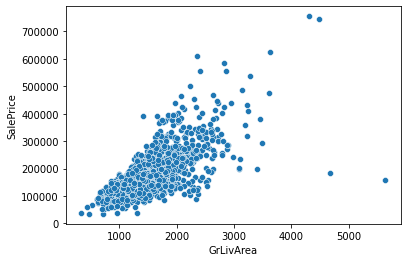

46


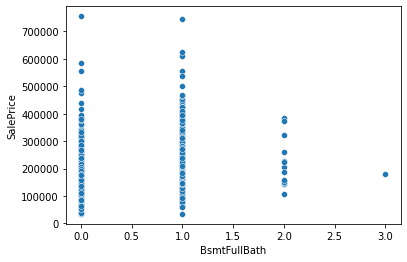

47


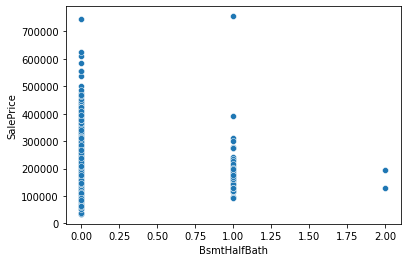

48


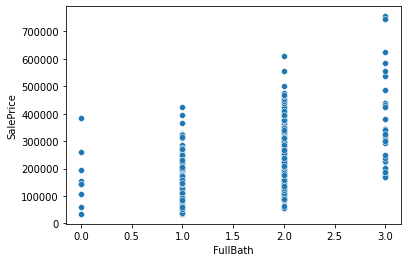

49


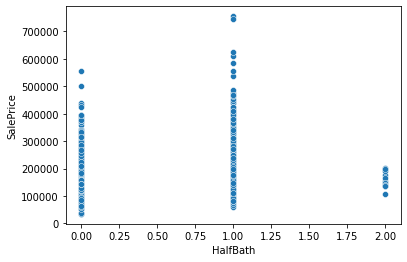

50


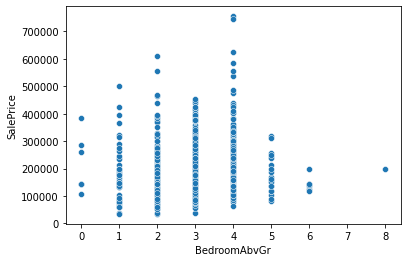

51


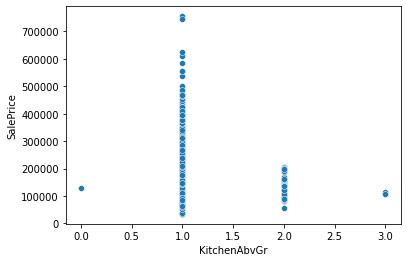

52


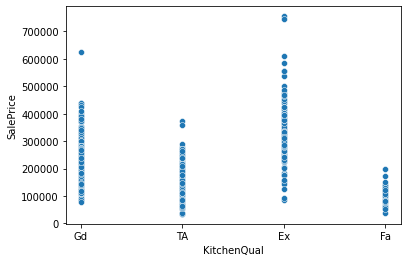

53


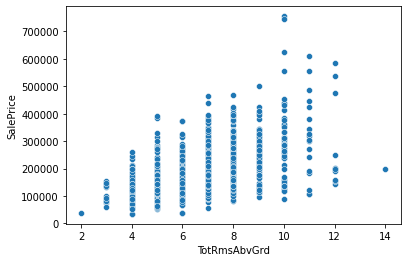

54


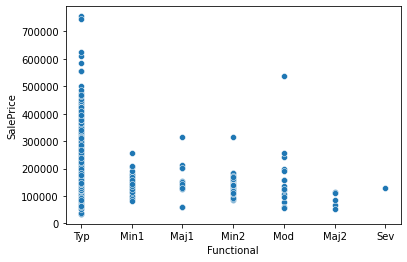

55


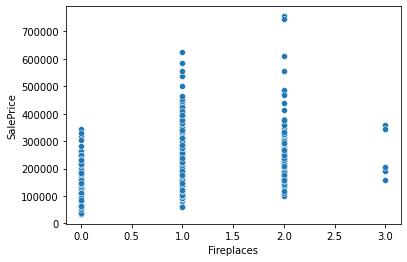

56


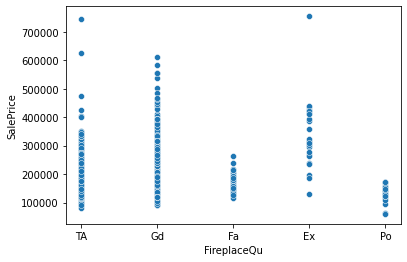

57


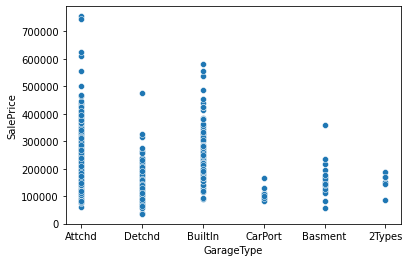

58


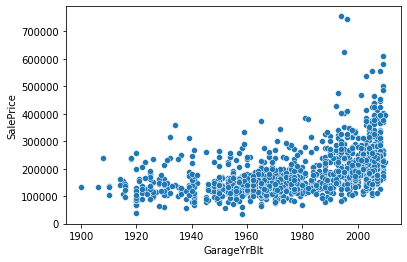

59


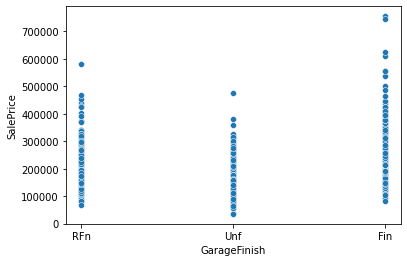

60


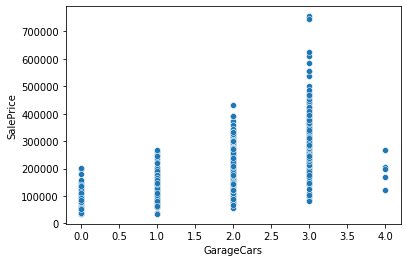

61


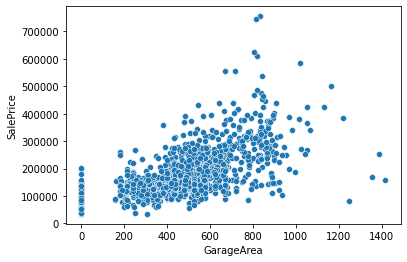

62


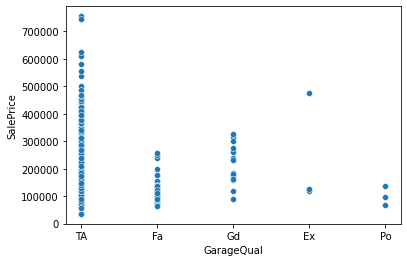

63


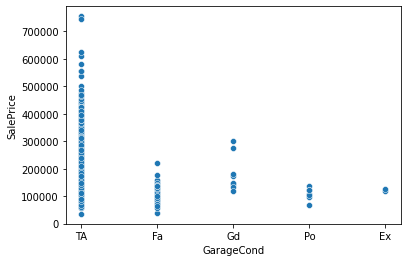

64


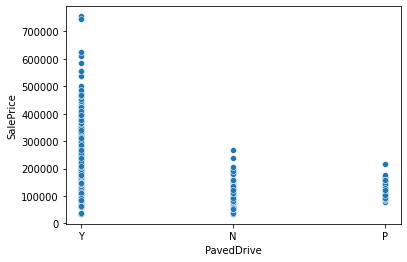

65


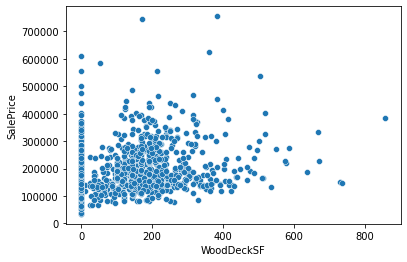

66


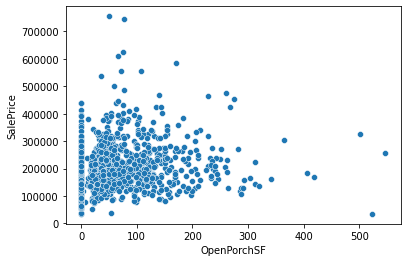

67


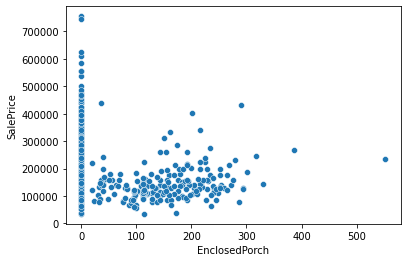

68


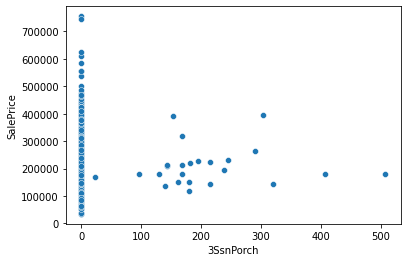

69


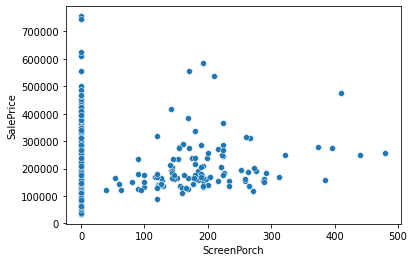

70


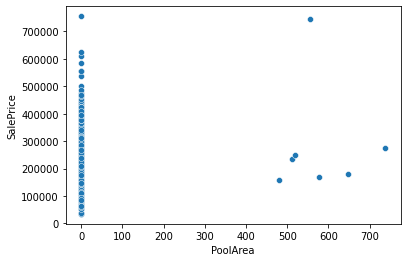

71


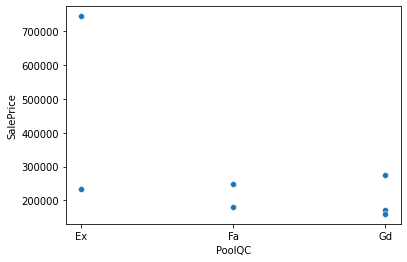

72


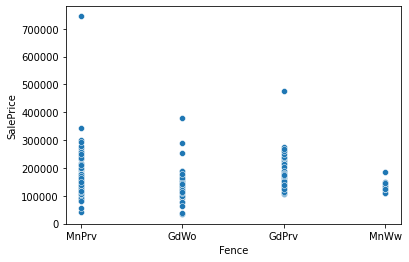

73


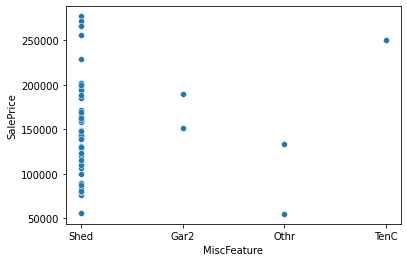

74


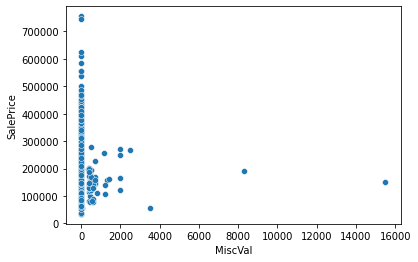

75


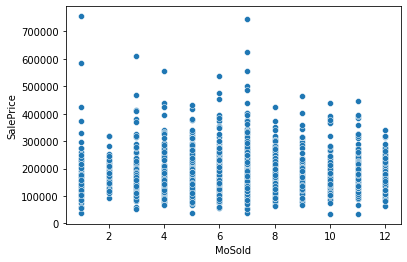

76


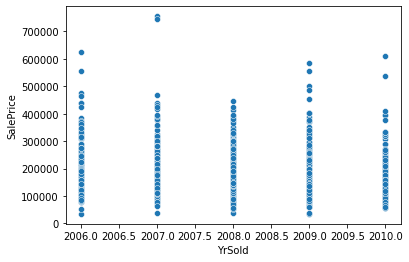

77


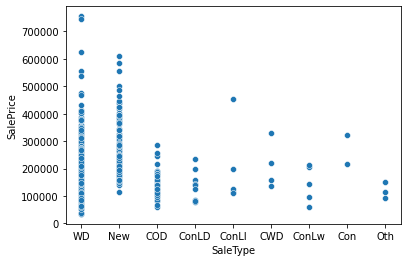

78


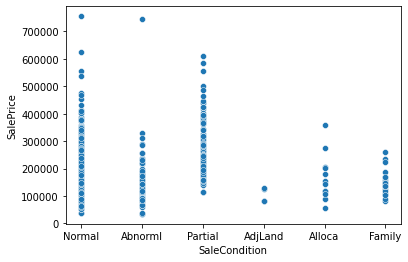

79


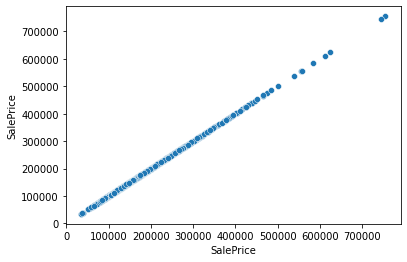

80


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

i=0
for col in train.columns:
        ax=sns.scatterplot(data=train, x=col, y="SalePrice")
        plt.show()
        print(i)
        i+=1

In [16]:
#Creating a copy of train dataset
train_clean=train.copy()

In [17]:
#I will remove variables with a number of NaN values greater than 80%
newlist = [x for x in train.columns if train[x].isna().sum() > 0]
na_val=train[newlist].isna().mean()*100
print(na_val)
print(train.shape)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64
(1460, 81)


In [18]:
train_clean.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [19]:
val=train.groupby('MSSubClass')['SalePrice'].median()
print(val.sort_values(ascending=False))

MSSubClass
60     215200.0
120    192000.0
80     166500.0
75     163500.0
20     159250.0
70     156000.0
160    146000.0
40     142500.0
85     140750.0
90     135980.0
50     132000.0
190    128250.0
45     107500.0
30      99900.0
180     88500.0
Name: SalePrice, dtype: float64


In [20]:
train.SalePrice.max()

755000

In [21]:
train_clean.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [22]:
#Drop ID variable
train_clean.drop('Id',axis=1,inplace=True)

In [23]:
#Binning MSSubClass Value

bin_MSSubClass = {'60': 'Type1',
                   '120': 'Type1',
                   '80':'Type2',
                    '75':'Type2',
                    '20':'Type2',
                      '70':'Type2',
                      '160':'Type2',
                      '40':'Type2',
                      '85':'Type2',
                      '90':'Type2',
                      '50':'Type3',
                      '190':'Type3',
                      '45':'Type3',
                      '30':'Type4',
                      '180':'Type4'}

train_clean['bin_MSSubClass'] = train_clean['MSSubClass'].map(bin_MSSubClass)

#Removing MSSubClass

train_clean.drop('MSSubClass',axis=1,inplace=True)

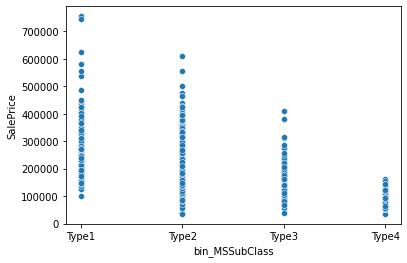

In [24]:
ax=sns.scatterplot(data=train_clean, x='bin_MSSubClass', y="SalePrice")
plt.show()
        

<AxesSubplot:xlabel='bin_MSSubClass', ylabel='count'>

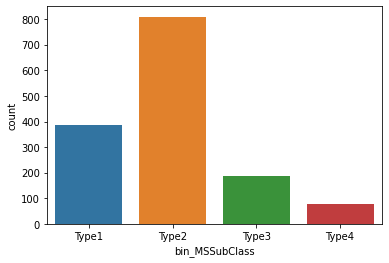

In [25]:
sns.countplot(data=train_clean,x='bin_MSSubClass')

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

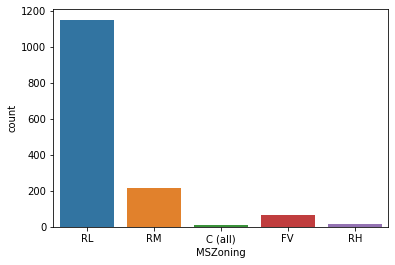

In [26]:
#MSZoning
sns.countplot(data=train,x='MSZoning')
#Binning C FV and RH because there are  few observations

In [27]:
#Binning MSZoning Value

bin_MSZoning = {'RL': 'RL',
                   'RM': 'RM',
                   'C(All)':'Other',
                    'FV':'Other',
                    'RH':'Other',
                     }

train_clean['bin_MSZoning'] = train_clean['MSZoning'].map(bin_MSZoning)



<AxesSubplot:xlabel='bin_MSZoning', ylabel='count'>

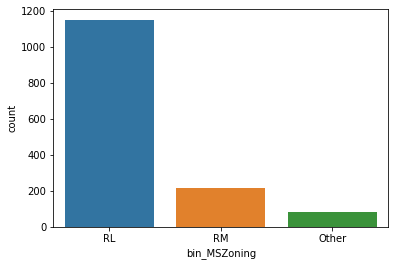

In [28]:
sns.countplot(data=train_clean,x='bin_MSZoning')

<AxesSubplot:xlabel='bin_MSZoning', ylabel='SalePrice'>

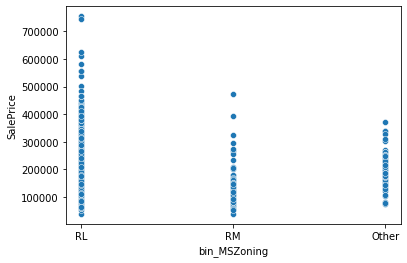

In [29]:
sns.scatterplot(data=train_clean,x='bin_MSZoning',y='SalePrice')

In [30]:
#Removing MSZoning
train_clean.drop('MSZoning',axis=1,inplace=True)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

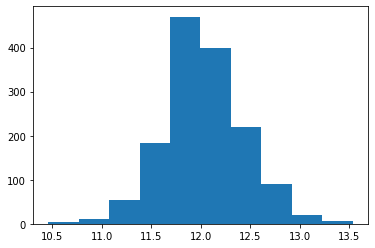

In [31]:
#Try to balance SalePrice distribution
# 'Salary' column
train_clean['ln_SalePrice'] = np.log(train_clean['SalePrice'])
plt.hist(train_clean['ln_SalePrice'])
#After

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

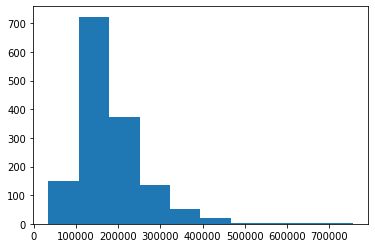

In [32]:
#Before
plt.hist(train['SalePrice'])

In [33]:
#Lotshape
val=train.groupby('LotShape')['SalePrice'].median()
print(val.sort_values(ascending=False))

LotShape
IR2    221000.0
IR3    203570.0
IR1    189000.0
Reg    146000.0
Name: SalePrice, dtype: float64


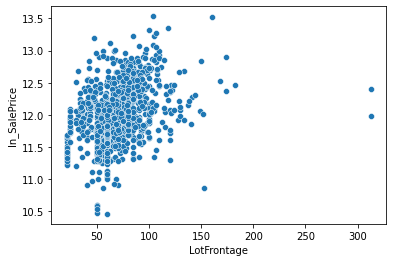

0


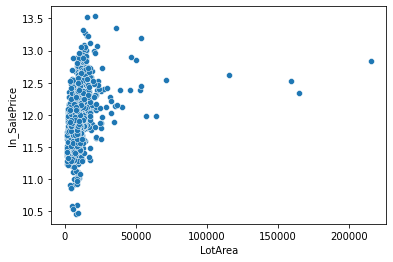

1


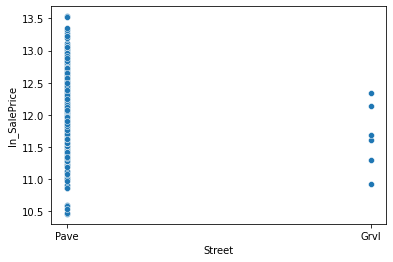

2


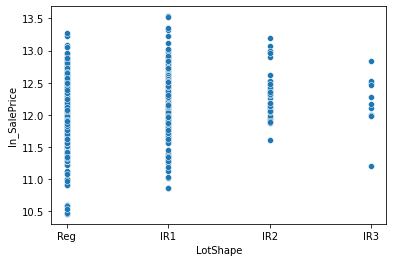

3


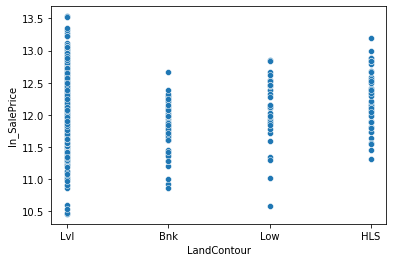

4


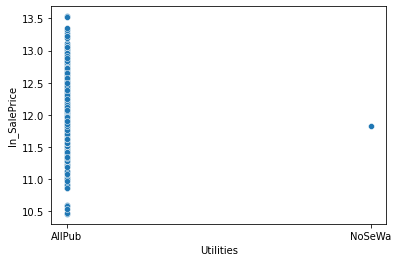

5


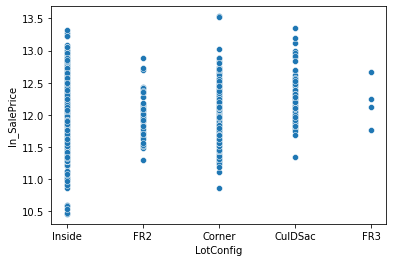

6


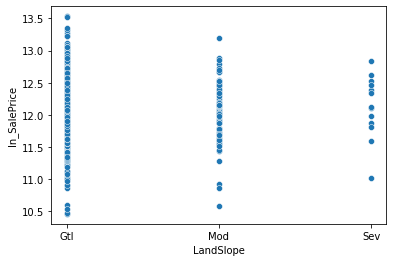

7


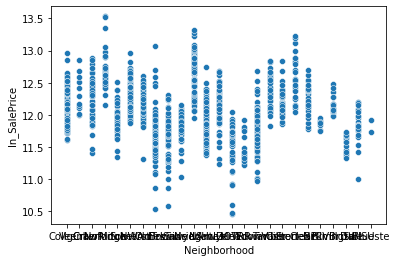

8


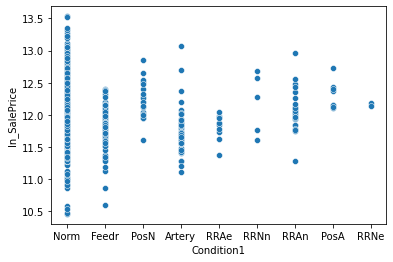

9


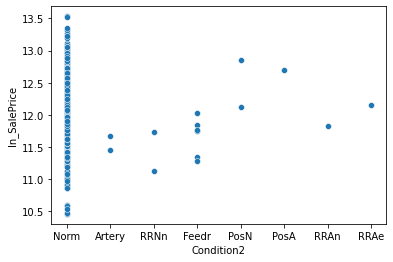

10


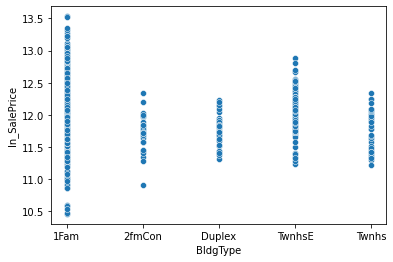

11


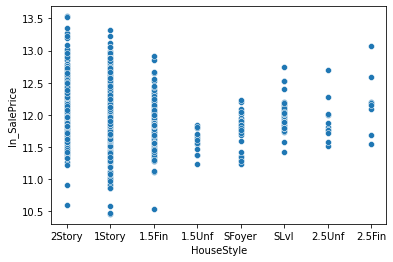

12


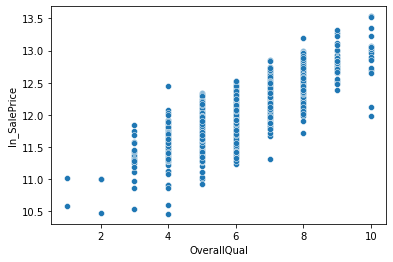

13


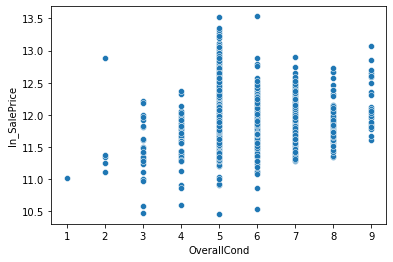

14


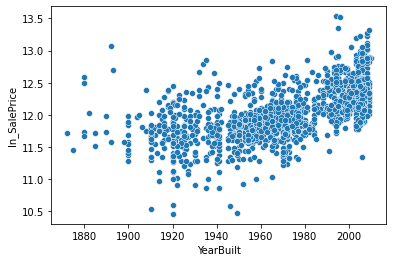

15


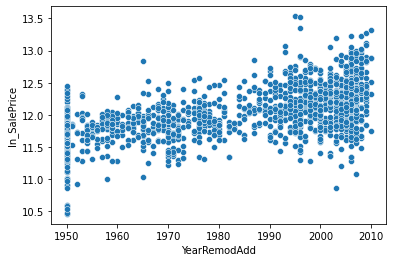

16


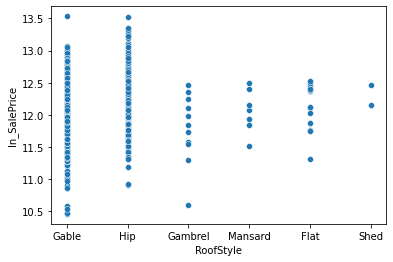

17


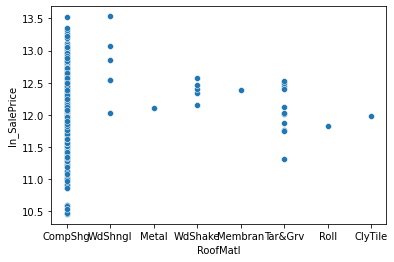

18


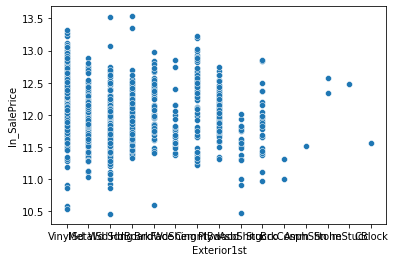

19


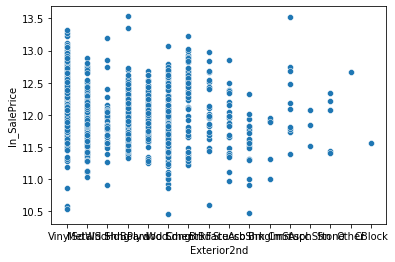

20


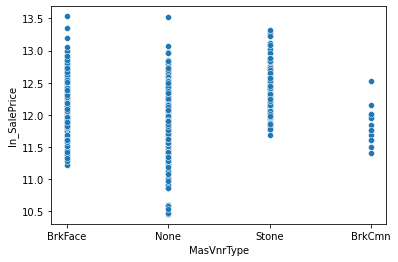

21


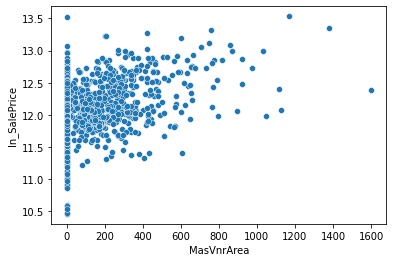

22


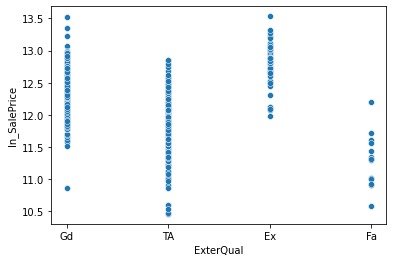

23


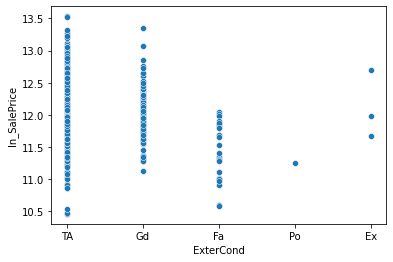

24


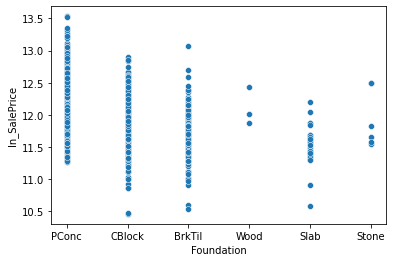

25


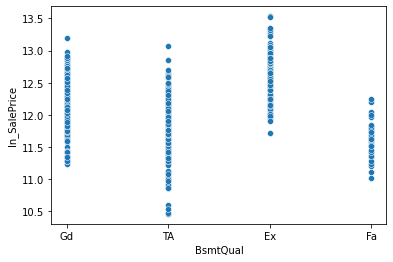

26


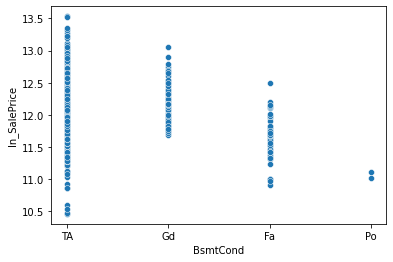

27


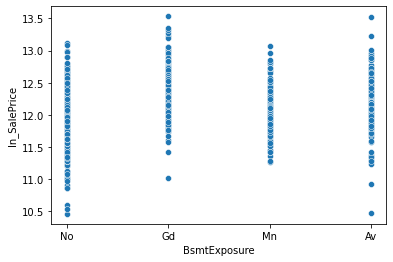

28


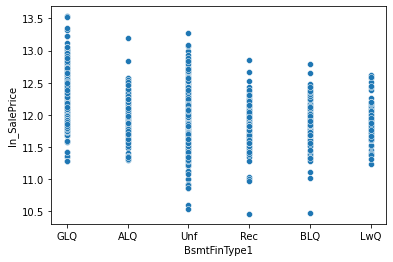

29


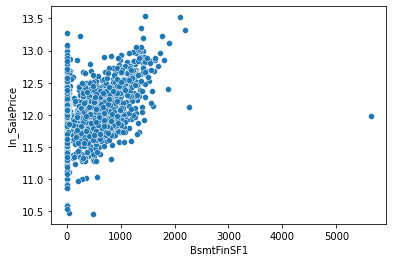

30


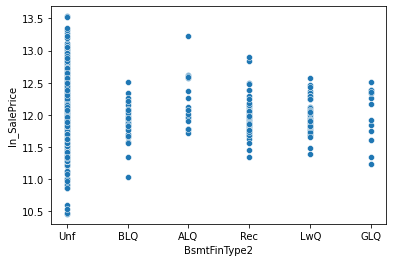

31


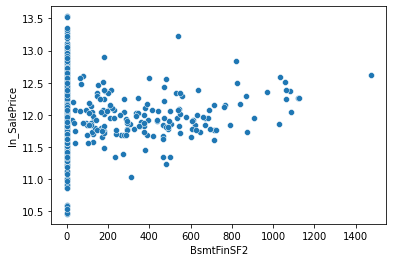

32


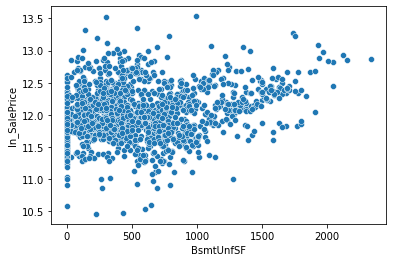

33


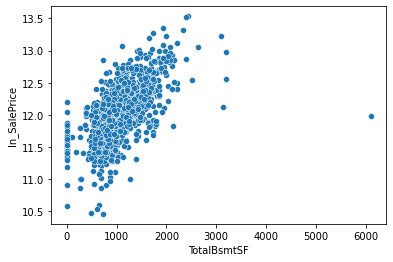

34


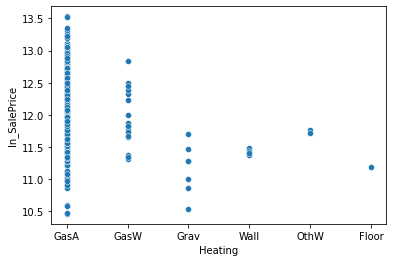

35


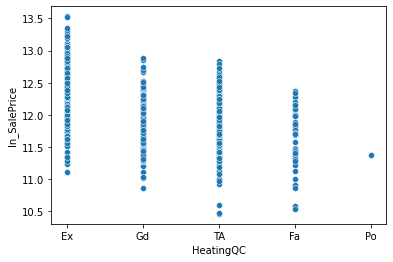

36


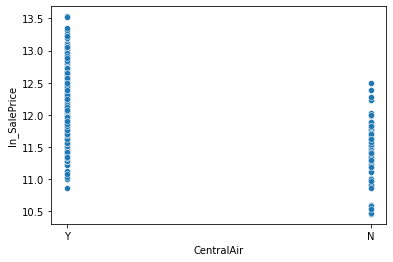

37


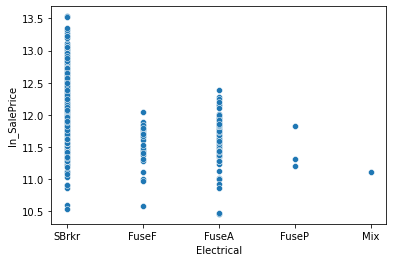

38


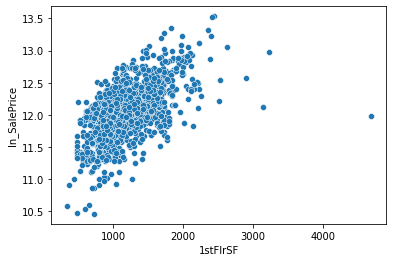

39


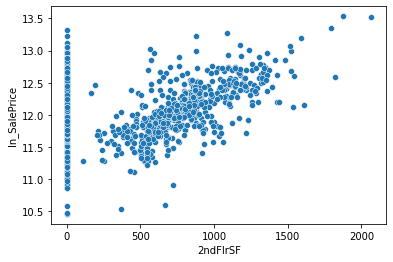

40


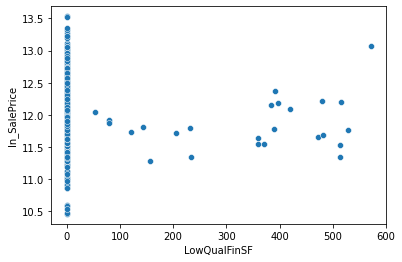

41


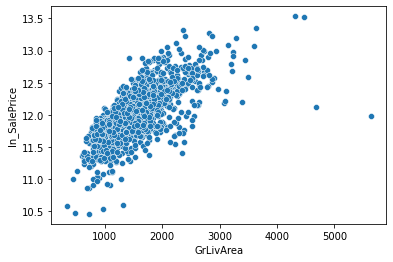

42


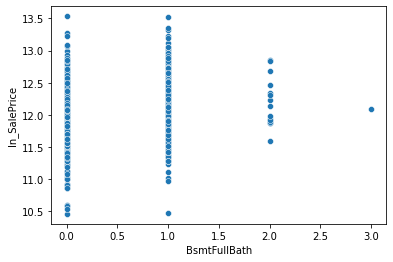

43


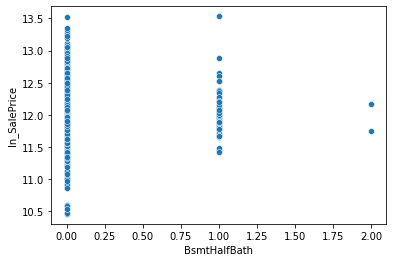

44


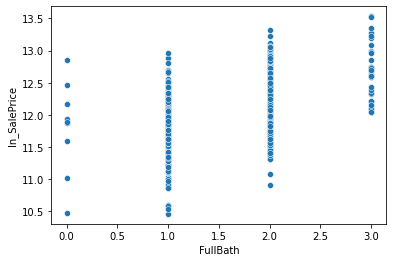

45


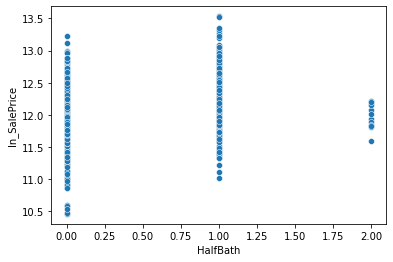

46


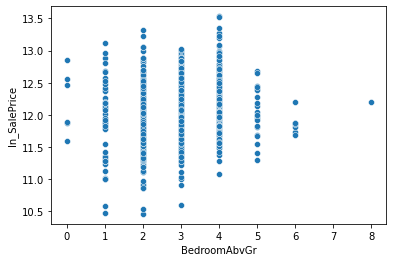

47


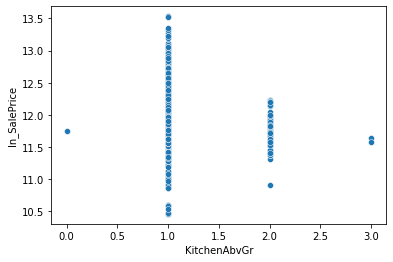

48


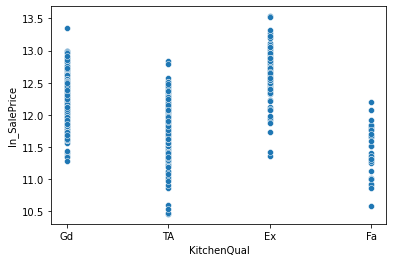

49


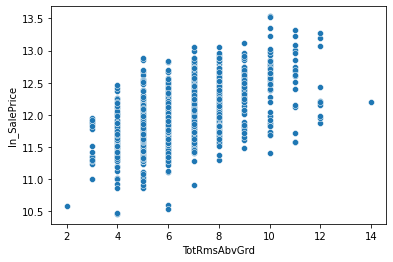

50


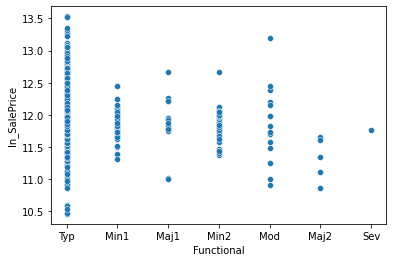

51


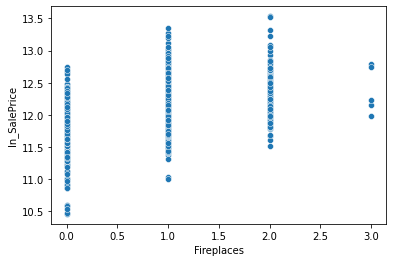

52


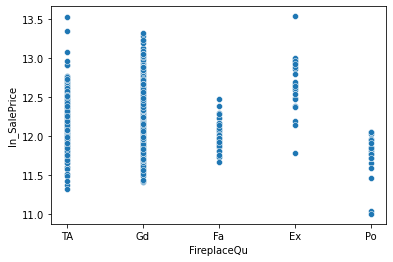

53


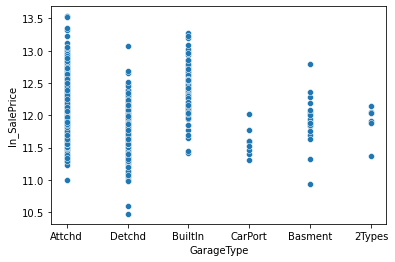

54


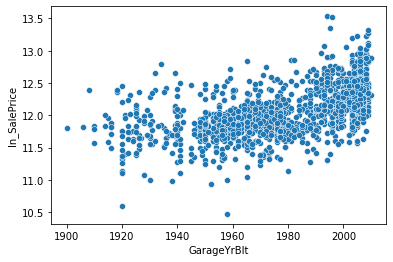

55


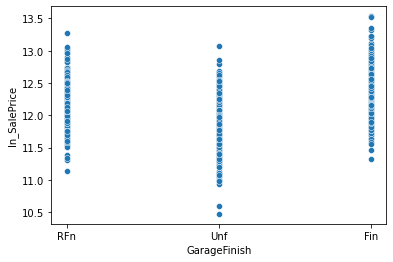

56


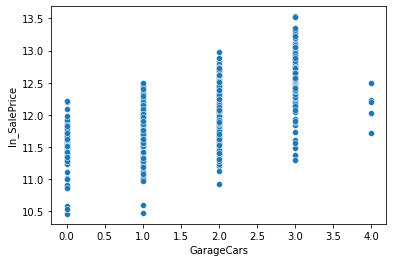

57


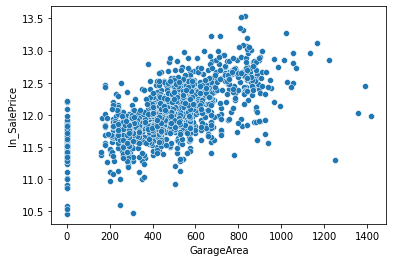

58


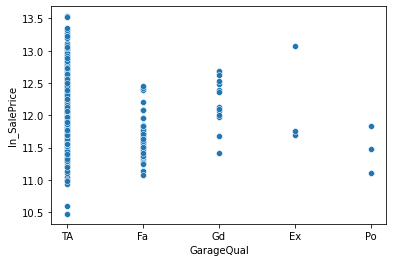

59


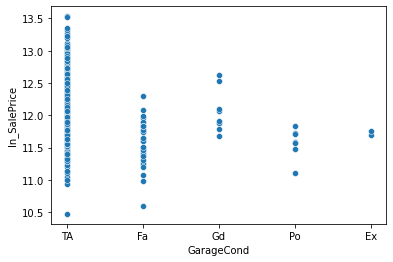

60


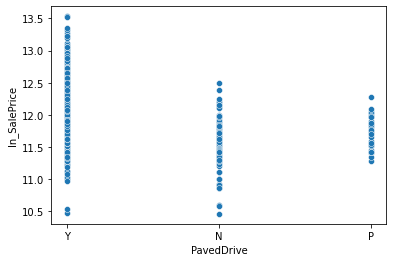

61


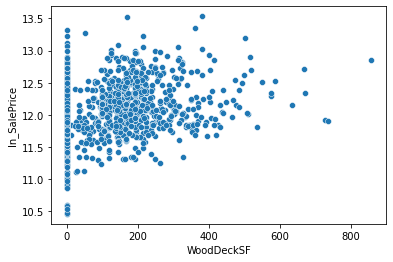

62


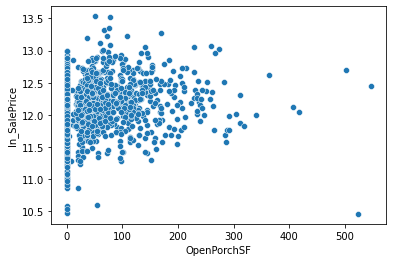

63


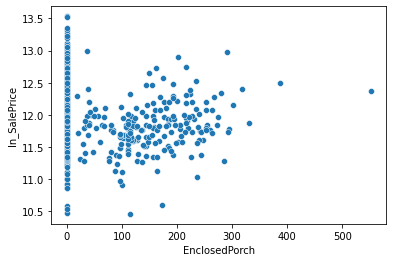

64


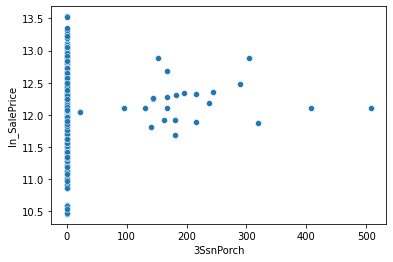

65


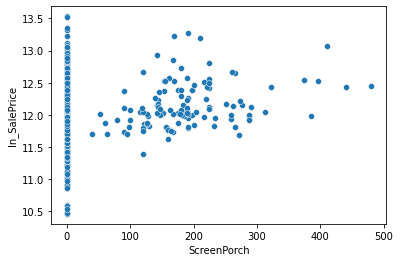

66


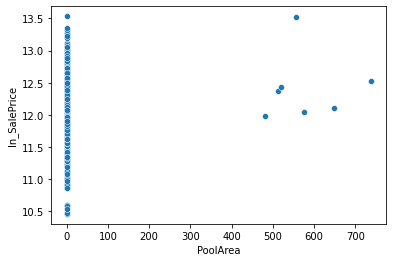

67


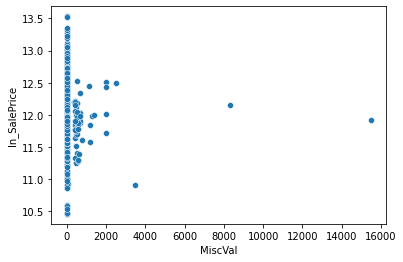

68


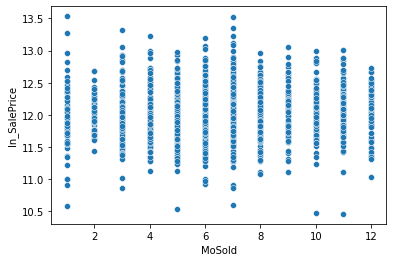

69


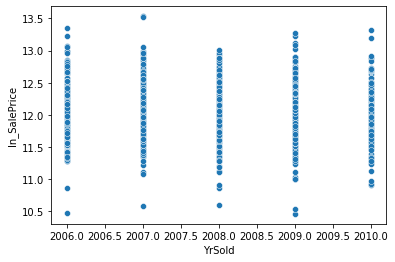

70


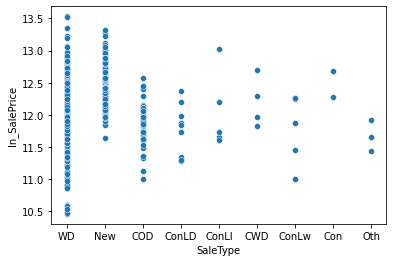

71


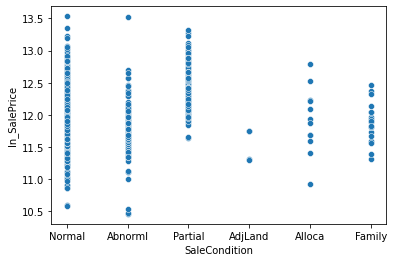

72


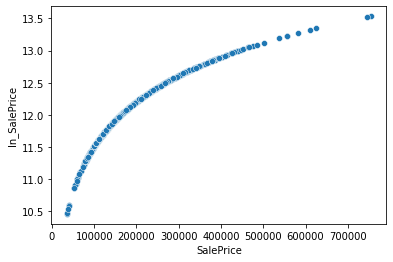

73


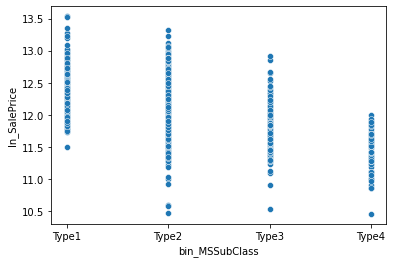

74


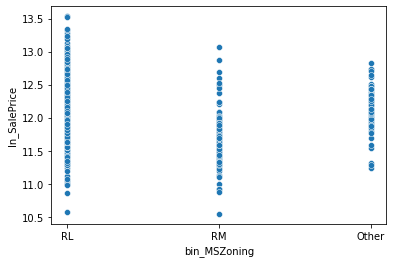

75


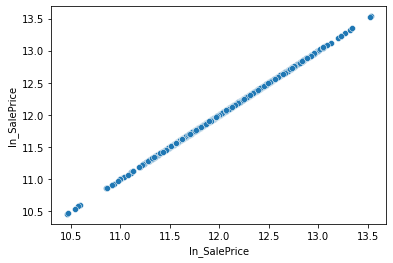

76


In [34]:
i=0
for col in train_clean.columns:
        ax=sns.scatterplot(data=train_clean, x=col, y="ln_SalePrice")
        plt.show()
        print(i)
        i+=1

# Correlation Matrix